## Project House SalePrice Prediction

In [4]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the dataset
df_train = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\Code\train.csv")
df_test = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\Code\test.csv")

In [7]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [8]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [9]:
# Checking for datatypes
df_train.dtypes,df_test.dtypes


(Id                 int64
 MSSubClass         int64
 MSZoning          object
 LotFrontage      float64
 LotArea            int64
                   ...   
 MoSold             int64
 YrSold             int64
 SaleType          object
 SaleCondition     object
 SalePrice          int64
 Length: 81, dtype: object,
 Id                 int64
 MSSubClass         int64
 MSZoning          object
 LotFrontage      float64
 LotArea            int64
                   ...   
 MiscVal            int64
 MoSold             int64
 YrSold             int64
 SaleType          object
 SaleCondition     object
 Length: 80, dtype: object)

In [11]:
# Checking values of every column in train columns
for col in df_train.columns:
    print(col)
    print(df_train[col].value_counts())
    print()

Id
1460    1
501     1
476     1
477     1
478     1
       ..
959     1
961     1
962     1
963     1
1       1
Name: Id, Length: 1168, dtype: int64

MSSubClass
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

LotFrontage
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

LotArea
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64

Street
Pave    1164
Grvl       4
Name: Street, dtype: int64

Alley
Grvl    41
Pave    36
Name: Alley, dtype: int64

LotShape
Reg    740
IR1    3

In [12]:
# checking value of every column in test dataframe
for col in df_test.columns:
    print(col)
    print(df_test[col].value_counts())
    print()

Id
56      1
1217    1
1185    1
162     1
676     1
       ..
340     1
855     1
858     1
1371    1
512     1
Name: Id, Length: 292, dtype: int64

MSSubClass
20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
190      4
180      4
75       2
45       2
85       1
40       1
Name: MSSubClass, dtype: int64

MSZoning
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64

LotFrontage
60.0     32
85.0     14
50.0     13
70.0     12
80.0      9
         ..
124.0     1
71.0      1
138.0     1
34.0      1
69.0      1
Name: LotFrontage, Length: 65, dtype: int64

LotArea
7200     7
1680     4
7500     3
5400     3
8450     3
        ..
10335    1
14157    1
7599     1
8520     1
12800    1
Name: LotArea, Length: 249, dtype: int64

Street
Pave    290
Grvl      2
Name: Street, dtype: int64

Alley
Grvl    9
Pave    5
Name: Alley, dtype: int64

LotShape
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dt

# Data Preprocessing

In [14]:
# Delete the unnecessary column

df_train.drop('Id',axis=1,inplace=True)
df_train.drop('Utilities',axis=1,inplace=True)
df_train.drop('PoolArea',axis=1,inplace=True)
df_train.drop('PoolQC',axis=1,inplace=True)

df_test.drop('Id',axis=1,inplace=True)
df_test.drop('Utilities',axis=1,inplace=True)
df_test.drop('PoolArea',axis=1,inplace=True)
df_test.drop('PoolQC',axis=1,inplace=True)



## Handling Missing value

In [15]:
# checking null values
df_train.isnull().sum(),df_test.isnull().sum()

(MSSubClass         0
 MSZoning           0
 LotFrontage      214
 LotArea            0
 Street             0
                 ... 
 MoSold             0
 YrSold             0
 SaleType           0
 SaleCondition      0
 SalePrice          0
 Length: 77, dtype: int64,
 MSSubClass        0
 MSZoning          0
 LotFrontage      45
 LotArea           0
 Street            0
                  ..
 MiscVal           0
 MoSold            0
 YrSold            0
 SaleType          0
 SaleCondition     0
 Length: 76, dtype: int64)

Missing value in our train & test both dataset

In [18]:
# Checking columns name
df_train.columns,df_test.columns

(Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
        'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
        'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
        'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
        'W

In [19]:
# comparing the 'YearBuilt' column with 'GarageYrBlt'
df = pd.DataFrame({})
df['Garage_Year'] = df_train['GarageYrBlt']
df['YearBuilt'] = df_train['YearBuilt']
df

Garage_Year  YearBuilt
0          1977.0       1976
1          1970.0       1970
2          1997.0       1996
3          1977.0       1977
4          1977.0       1977
...           ...        ...
1163       1970.0       1967
1164       2002.0       1949
1165       1976.0       1976
1166       1920.0       1920
1167       2002.0       2002

[1168 rows x 2 columns]

### Filling Null Values for Train Dataset

In [20]:
df_train['MiscFeature'].fillna('None',inplace=True)
print(df_train['MiscFeature'].value_counts())

df_train['Alley'].fillna('None',inplace=True)
print(df_train['Alley'].value_counts())

df_train['Fence'].fillna('None',inplace=True)
print(df_train['Fence'].value_counts())

df_train['FireplaceQu'].fillna('None',inplace=True)
print(df_train['FireplaceQu'].value_counts())

basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
# As per given definition, NA means No_Basement. Let's replace NAs with 'No_Basement'
for i in basement:
    df_train[i].fillna('No_Basement',inplace=True)
    print(df_train[i].value_counts())
    
garage=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage:
    print(df_train[i].value_counts())
# As per given definition, NA means No_Garage (Refer Variable Description at the end of the notebook). Let's replace NAs with 'No_Garage'
for i in garage:
    df_train[i].fillna('No_Garage',inplace=True)
    print(df_train[i].value_counts())
    
 # As per given values of MasVnrType,  Let's replace NAs with 'none' that is with mode value
df_train['MasVnrType'].fillna('None',inplace=True)
print(df_train['MasVnrType'].value_counts())

# As per given values of MasVnrArea,  Let's replace NAs with 'none' that is with mode value
df_train['MasVnrArea'].fillna(0,inplace=True)
print(df_train['MasVnrArea'].value_counts())

# As per given values of LotFrontage,  Let's replace NAs with 'median' of the same column
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(),inplace=True)
print(df_train['LotFrontage'].value_counts())

# As per dataframe "df" we can say that most of the rows of GarageYrBlt has same value as YearBuilt so we replace with that
df_train["GarageYrBlt"]=df_train["GarageYrBlt"].fillna(df_train["YearBuilt"])
print(df_train['GarageYrBlt'].value_counts())


None    1124
Shed      40
Gar2       2
Othr       1
TenC       1
Name: MiscFeature, dtype: int64
None    1091
Grvl      41
Pave      36
Name: Alley, dtype: int64
None     931
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64
None    551
Gd      301
TA      252
Fa       25
Ex       21
Po       18
Name: FireplaceQu, dtype: int64
TA             517
Gd             498
Ex              94
No_Basement     30
Fa              29
Name: BsmtQual, dtype: int64
TA             1041
Gd               56
Fa               39
No_Basement      30
Po                2
Name: BsmtCond, dtype: int64
No             756
Av             180
Gd             108
Mn              93
No_Basement     31
Name: BsmtExposure, dtype: int64
Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No_Basement     30
Name: BsmtFinType1, dtype: int64
Unf            1002
Rec              43
LwQ              40
No_Basement      31
BLQ             

### Checking Missing value in train dataset

In [21]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

There is no missing value in our train dataset

### Filling Null Values for Test Dataset

In [27]:
df_test['MiscFeature'].fillna('None',inplace=True)
print(df_test['MiscFeature'].value_counts())

df_test['Alley'].fillna('None',inplace=True)
print(df_test['Alley'].value_counts())

df_test['Fence'].fillna('None',inplace=True)
print(df_test['Fence'].value_counts())

df_test['FireplaceQu'].fillna('None',inplace=True)
print(df_test['FireplaceQu'].value_counts())

basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
# As per given definition, NA means No_Basement. Let's replace NAs with 'No_Basement'
for i in basement:
    df_test[i].fillna('No_Basement',inplace=True)
    print(df_test[i].value_counts())
    
garage=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage:
    print(df_train[i].value_counts())
# As per given definition, NA means No_Garage (Refer Variable Description at the end of the notebook). Let's replace NAs with 'No_Garage'
for i in garage:
    
    df_test[i].fillna('No_Garage',inplace=True)
    print(df_test[i].value_counts())
    
 # As per given values of MasVnrType,  Let's replace NAs with 'none' that is with mode value
df_test['MasVnrType'].fillna('None',inplace=True)
print(df_test['MasVnrType'].value_counts())

# As per given values of MasVnrArea,  Let's replace NAs with 'none' that is with mode value
df_test['MasVnrArea'].fillna(0,inplace=True)
print(df_test['MasVnrArea'].value_counts())

# As per given values of LotFrontage,  Let's replace NAs with 'median' of the same column
df_test['LotFrontage'].fillna(df_train['LotFrontage'].median(),inplace=True)
print(df_test['LotFrontage'].value_counts())

# As per dataframe "df" we can say that most of the rows of GarageYrBlt has same value as YearBuilt so we replace with that
df_test["GarageYrBlt"]=df_train["GarageYrBlt"].fillna(df_train["YearBuilt"])
print(df_test['GarageYrBlt'].value_counts())


None    282
Shed      9
Othr      1
Name: MiscFeature, dtype: int64
None    278
Grvl      9
Pave      5
Name: Alley, dtype: int64
None     248
MnPrv     28
GdPrv      8
GdWo       7
MnWw       1
Name: Fence, dtype: int64
None    139
Gd       79
TA       61
Fa        8
Ex        3
Po        2
Name: FireplaceQu, dtype: int64
TA             132
Gd             120
Ex              27
No_Basement      7
Fa               6
Name: BsmtQual, dtype: int64
TA             270
Gd               9
No_Basement      7
Fa               6
Name: BsmtCond, dtype: int64
No             197
Av              41
Gd              26
Mn              21
No_Basement      7
Name: BsmtExposure, dtype: int64
GLQ            88
Unf            85
ALQ            46
BLQ            27
Rec            24
LwQ            15
No_Basement     7
Name: BsmtFinType1, dtype: int64
Unf            254
Rec             11
BLQ              9
No_Basement      7
LwQ              6
ALQ              3
GLQ              2
Name: BsmtFinType2, dtype:

### Checking Missing value in train dataset

In [28]:
df_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

There is no missing value in our test dataset

### Data Vizualization

#### Univariate Analysis

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

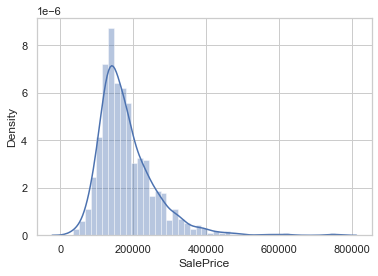

In [29]:
# Checking the target variable
sns.set(style='whitegrid')
sns.distplot(df_train['SalePrice'])
plt.show

df_train['SalePrice'].value_counts()

Maximum number of SalePrice lies between 140000 and 230000.

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

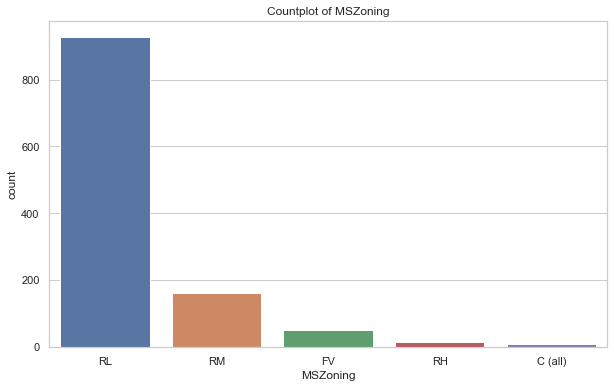

In [31]:
# checking the column MSZoning
plt.subplots(figsize=(10,6))
sns.countplot(x='MSZoning',data=df_train)
plt.title('Countplot of MSZoning')
plt.xlabel=('MSZoning')
plt.ylabel=('count')
plt.show

df_train['MSZoning'].value_counts()

Maximum, 935 number of MSZoning are RL.then RM then FV and RH,c(all)

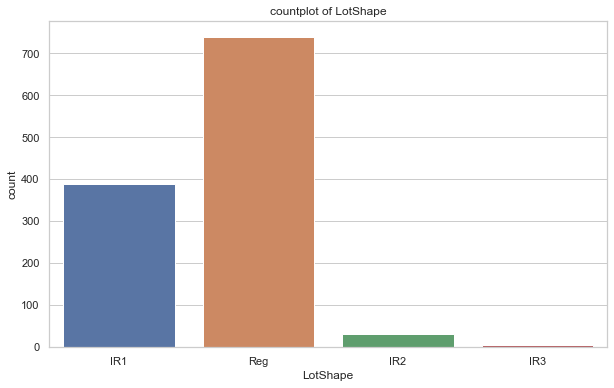

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [35]:
# checking the column LotShape
plt.subplots(figsize=(10,6))
sns.countplot(x='LotShape',data=df_train)
plt.title('countplot of LotShape')
plt.xlabel=('LotShape')
plt.ylabel=('count')
plt.show()

df_train['LotShape'].value_counts()

740 number reg and IR1 maximum number 390 then IR2 and IR3

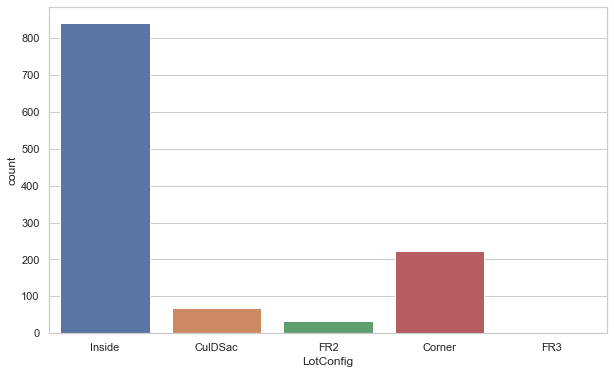

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [37]:
#checking the column LotConfig

plt.subplots(figsize=(10,6))
sns.countplot(x='LotConfig',data = df_train)
plt.title=('countplot of LotConfig')
plt.xlabel=('LotConfig')
plt.ylabel=('count')
plt.show()

df_train['LotConfig'].value_counts()


Maximum, 842 number of LotConfig are Inside.then Corner then CulDSac then FR2 and FR3

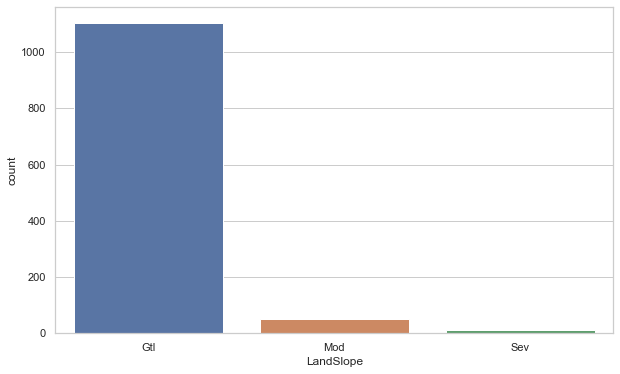

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [39]:
#checking the column LandSlope
plt.subplots(figsize=(10,6))
sns.countplot(x='LandSlope',data=df_train)
plt.title=('countsplot of LandSlope')
plt.xlabel=('LandSlope')
plt.ylabel=('count')
plt.show()

df_train['LandSlope'].value_counts()

Maximum, 1105 number of LandSlope are Gtl then Mod and Sev

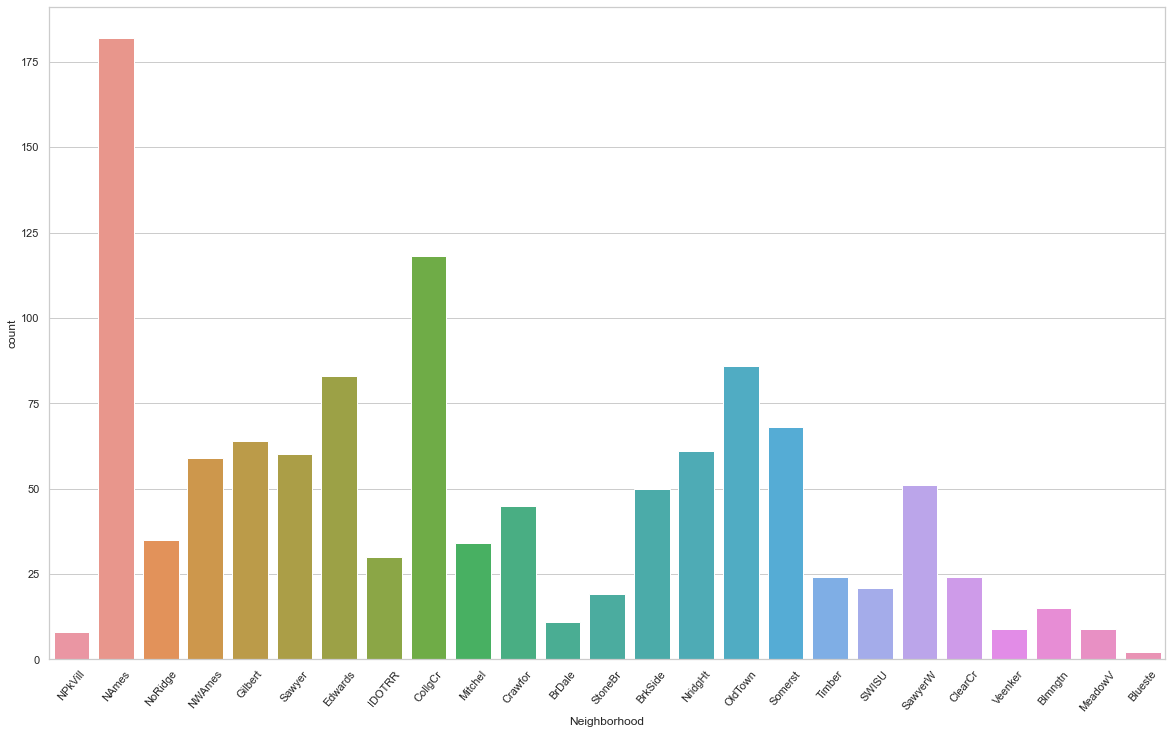

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [63]:
#checking the column Neighborhood
plt.subplots(figsize=(20,12))
sns.countplot(x='Neighborhood',data=df_train)
plt.title=('countplot of Neighborhood')
plt.xticks(rotation=50)
plt.xlabel=('Neighborhood')
plt.ylabel=('count')
plt.show()

df_train['Neighborhood'].value_counts()

Maximum, 182 number of Neighborhood are NAmes

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

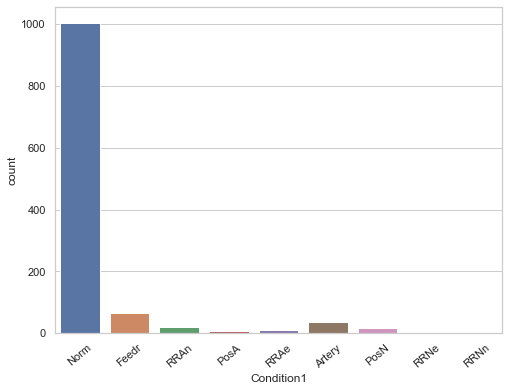

In [71]:
#checking the column Condition1
plt.subplots(figsize=(8,6))
sns.countplot(x=df_train.iloc[:,11])
plt.xticks(rotation=40)


df_train['Condition1'].value_counts()


Maximum, 1005 number of Condition1 is Norm.

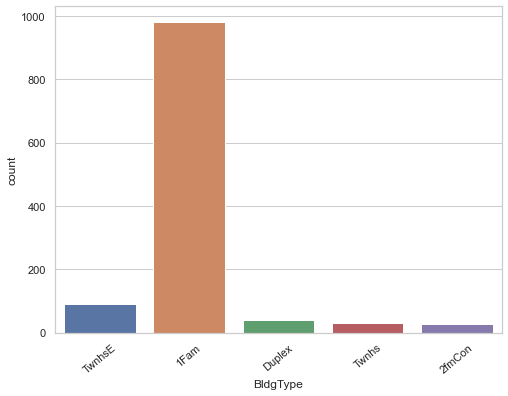

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [75]:
#checking the column BldgType
plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=df_train)

plt.xticks(rotation=40)


plt.show()

df_train['BldgType'].value_counts()

Maximum, 981 number of BldgType are 1Fam.

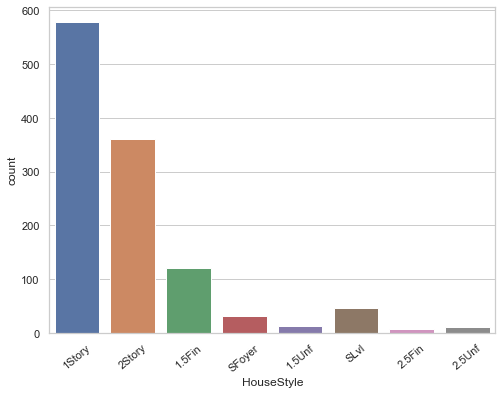

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [77]:
#checking the column HouseStyle
plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=df_train)

plt.xticks(rotation=40)

plt.show()

df_train['HouseStyle'].value_counts()

Maximum 1 Story 578 

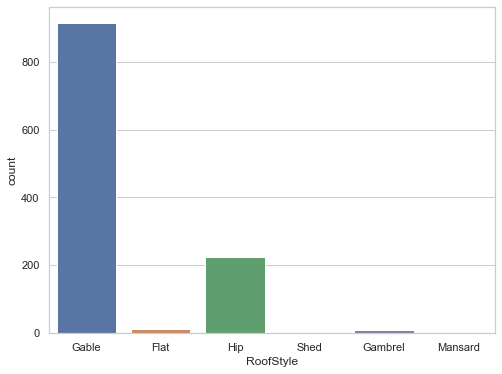

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [79]:
#checking the column RoofStyle
plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=df_train)

plt.show()

df_train['RoofStyle'].value_counts()

Maximum, 915 number of RoofStyle are Gable.

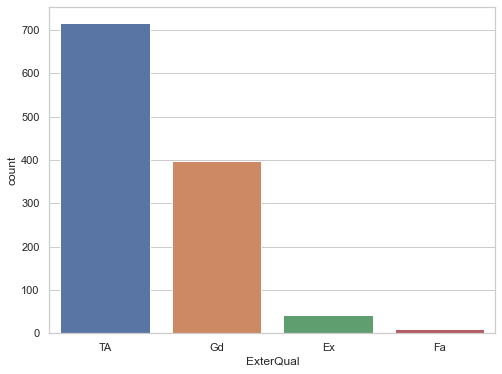

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [81]:
#checking the column ExterQual
plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=df_train)

plt.show()

df_train['ExterQual'].value_counts()

Maximum, 717 number of ExterQual is TA.

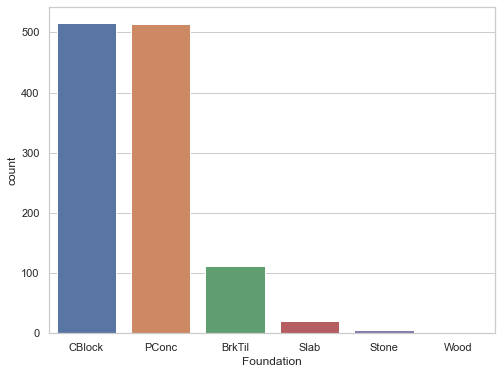

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [83]:
#checking the column Foundation
plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=df_train)

plt.show()

df_train['Foundation'].value_counts()

Maximum, 516 number of Foundation are CBlock.

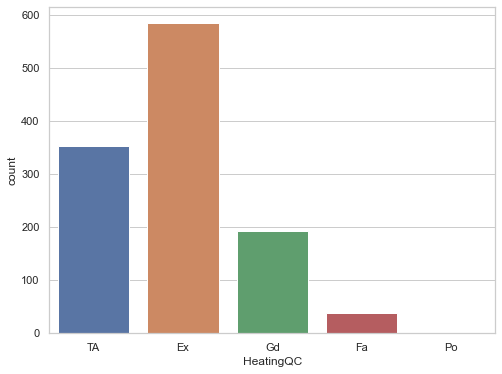

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [85]:
#checking the column HeatingQC
plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=df_train)

plt.show()

df_train['HeatingQC'].value_counts()

Maximum, 585 number of HeatingQC is Ex.

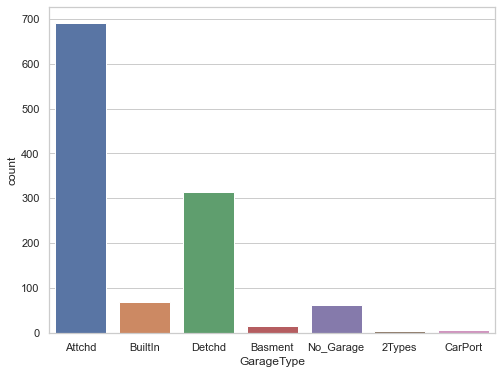

Attchd       691
Detchd       314
BuiltIn       70
No_Garage     64
Basment       16
CarPort        8
2Types         5
Name: GarageType, dtype: int64

In [87]:
#checking the column GarageType
plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=df_train)

plt.show()

df_train['GarageType'].value_counts()

Maximum, 691 number of GarageType are Attchd.

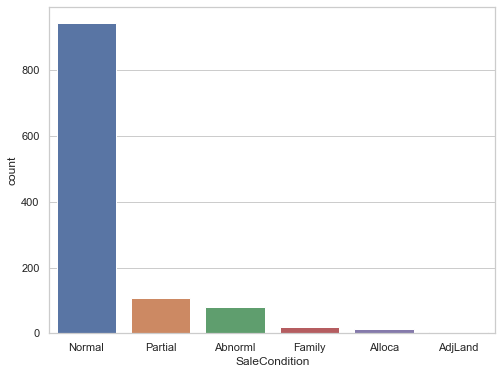

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [89]:
#checking the column SaleCondition
plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=df_train)

plt.show()

df_train['SaleCondition'].value_counts()

Maximum, 945 number of SaleCondition is normal.

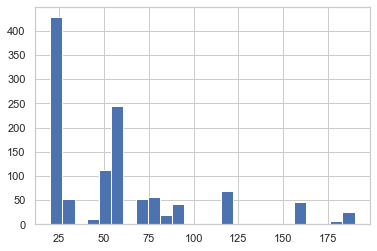

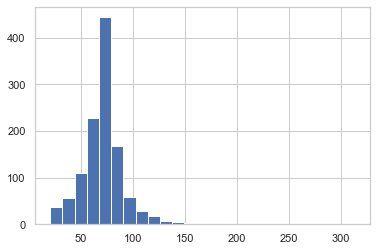

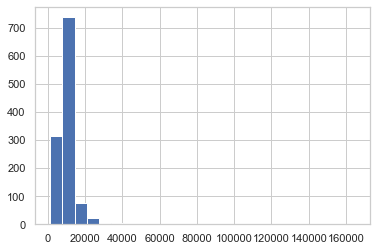

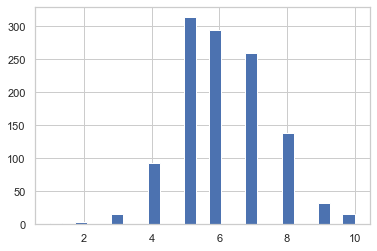

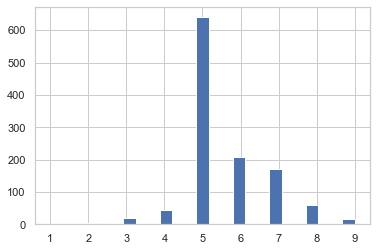

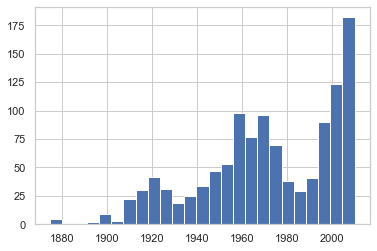

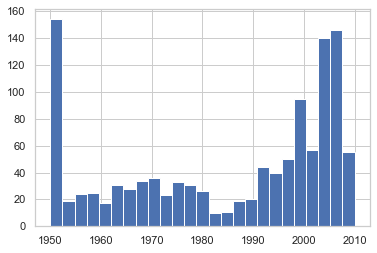

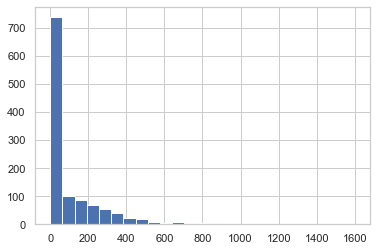

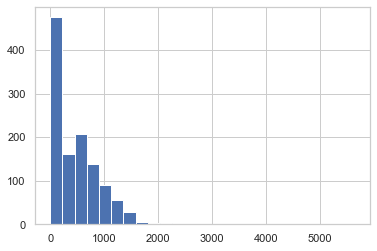

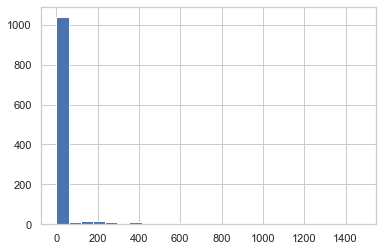

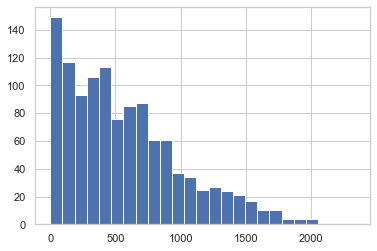

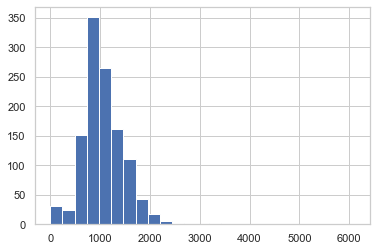

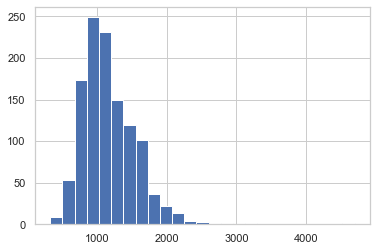

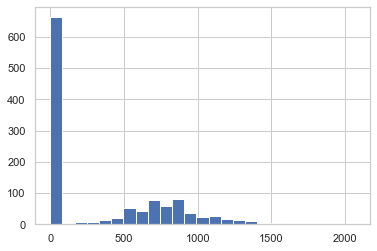

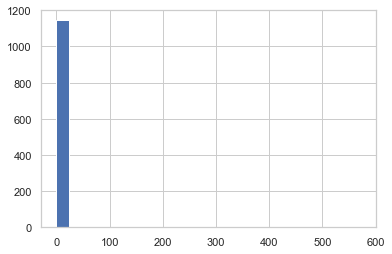

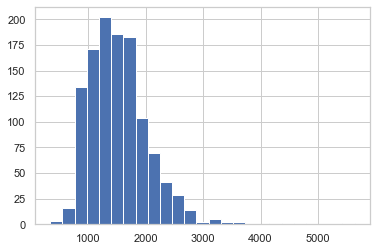

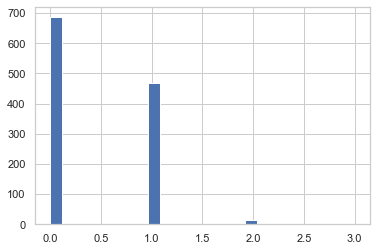

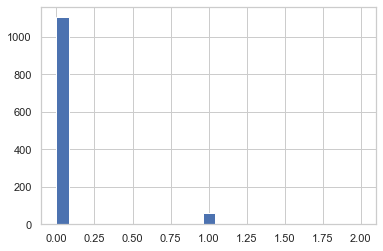

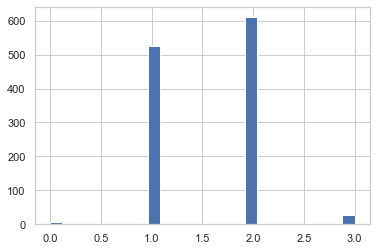

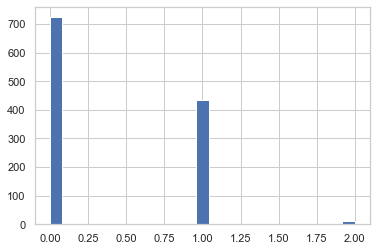

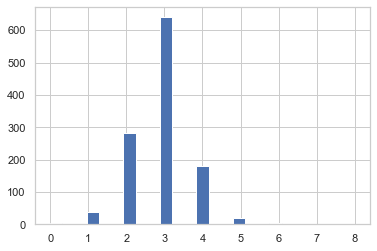

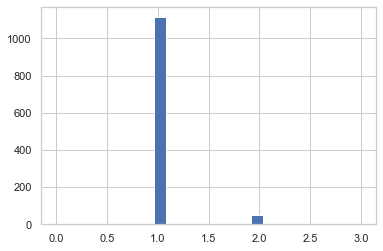

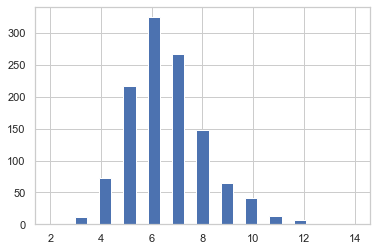

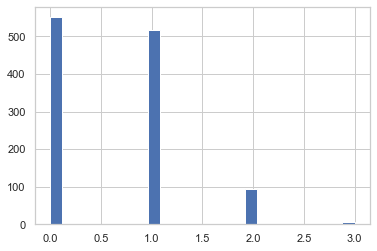

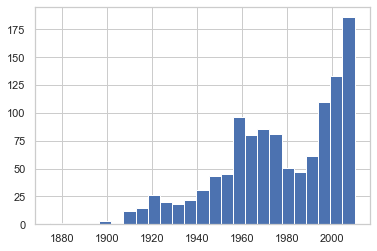

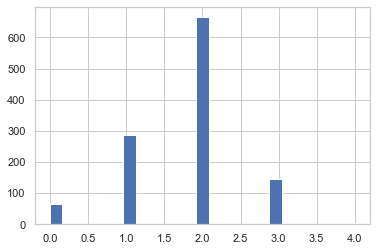

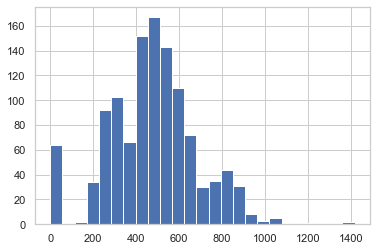

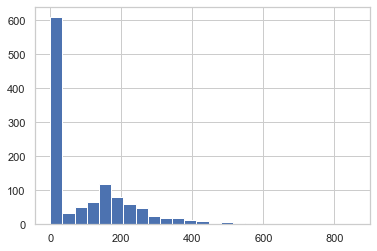

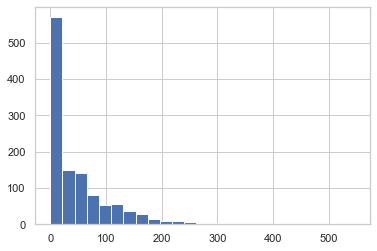

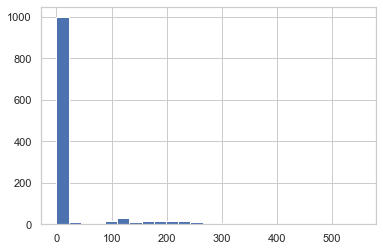

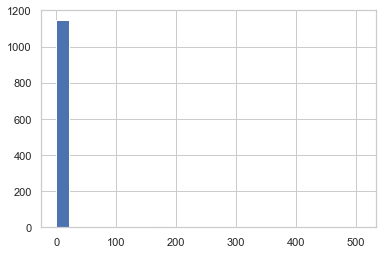

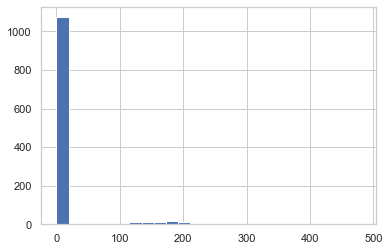

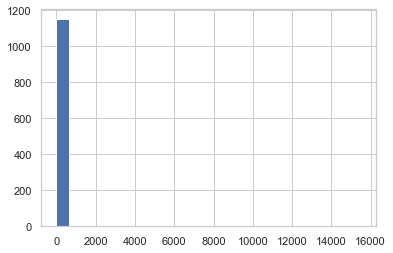

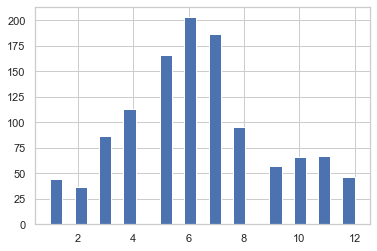

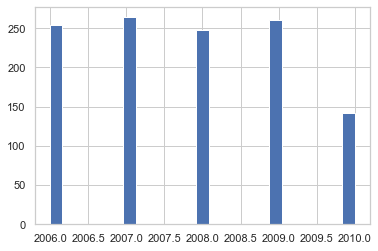

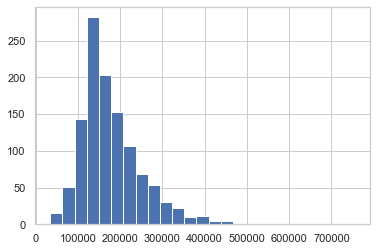

In [92]:
# creating histragram of every numerical column

for col in df_train.describe().columns:
    data=df_train.copy()
    data[col].hist(bins=25)
    
   
    plt.show()
    

### Bivariate Analysis

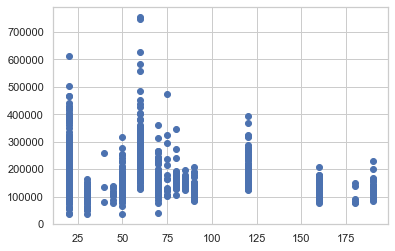

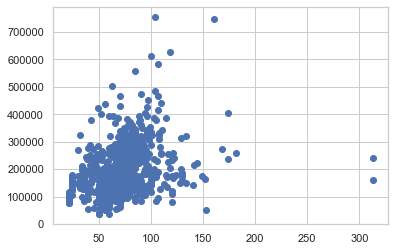

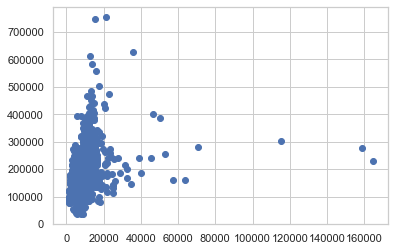

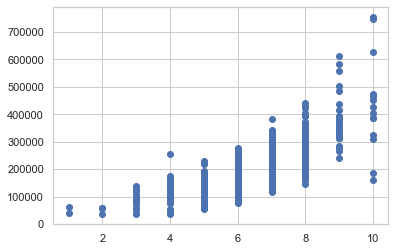

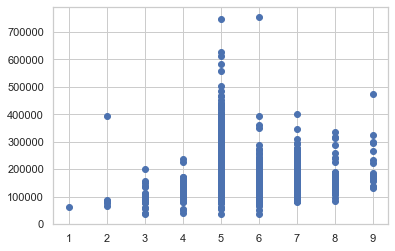

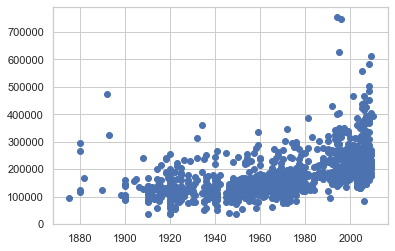

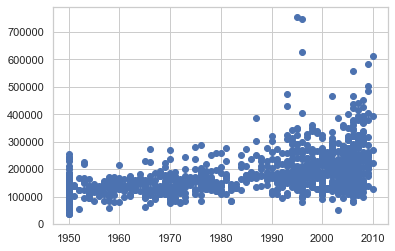

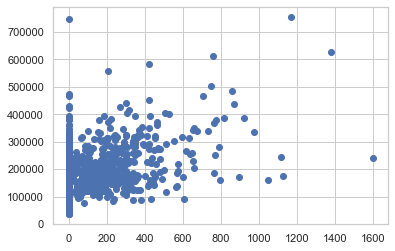

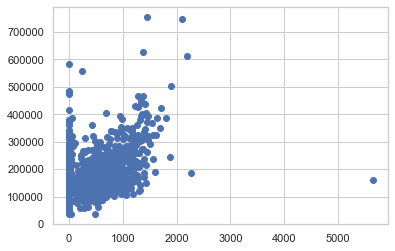

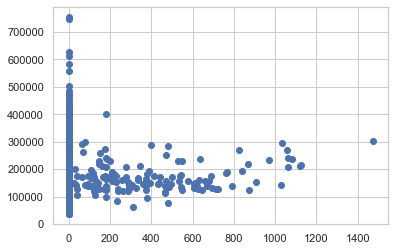

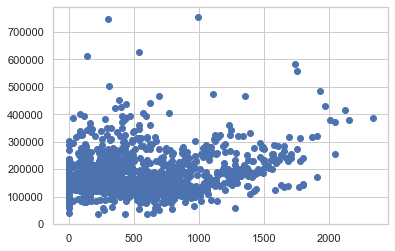

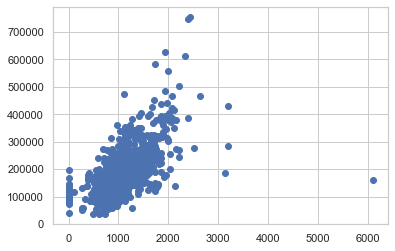

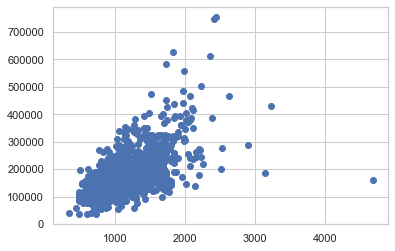

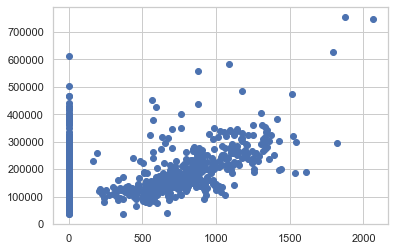

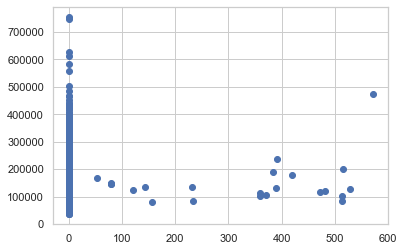

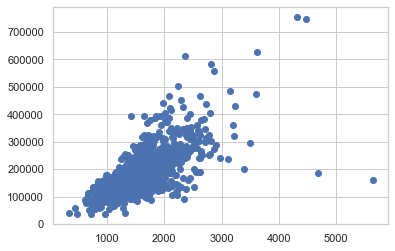

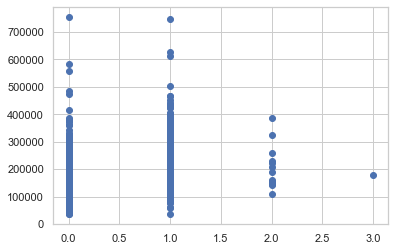

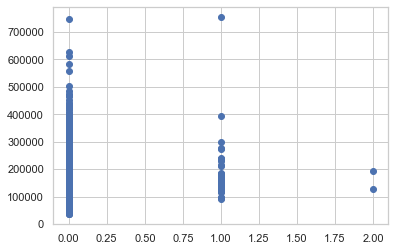

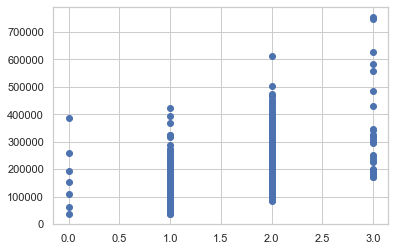

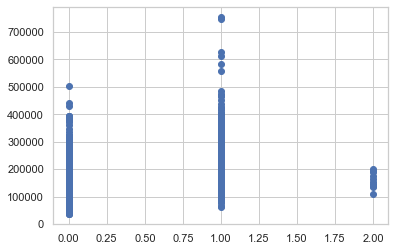

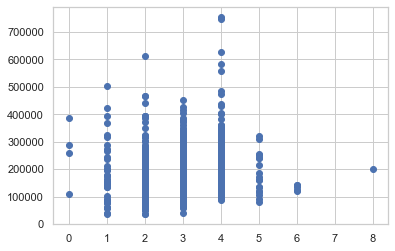

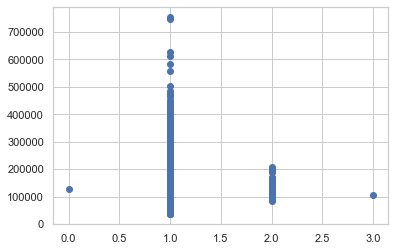

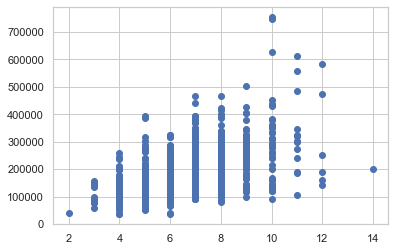

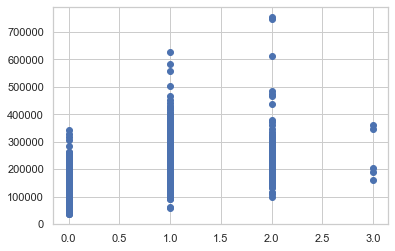

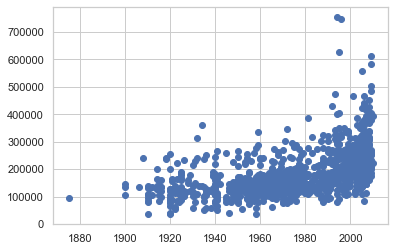

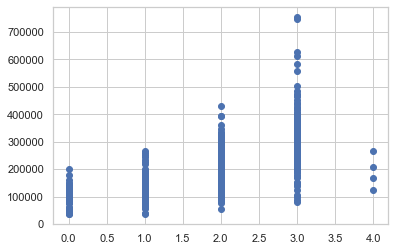

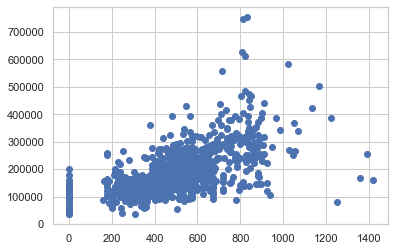

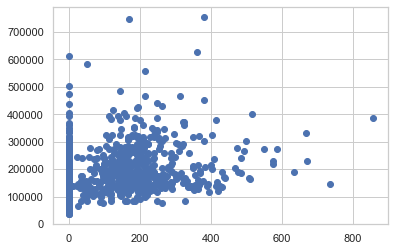

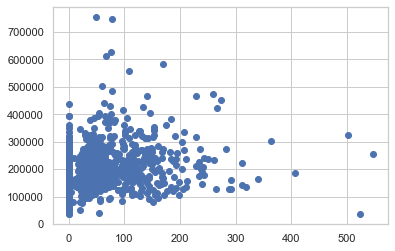

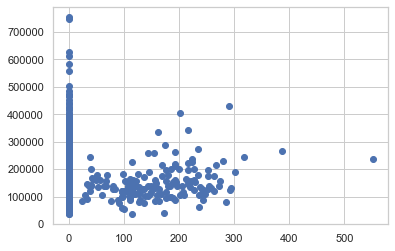

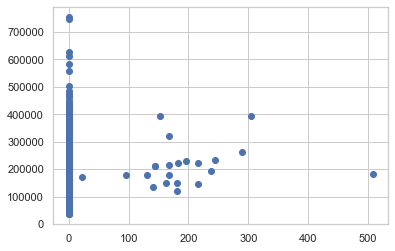

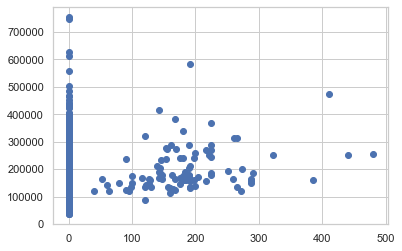

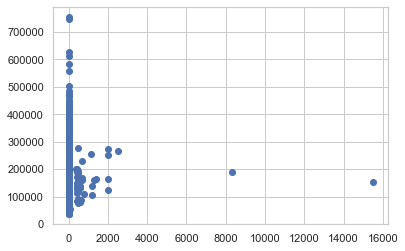

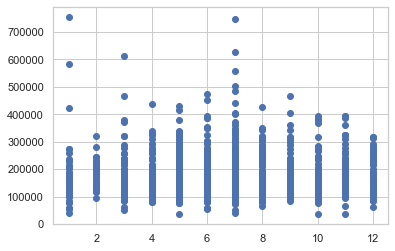

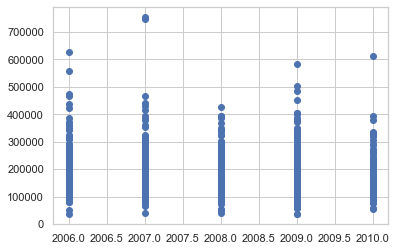

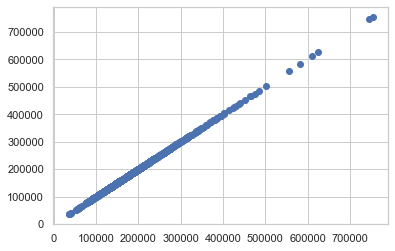

In [96]:
#Scatter plot between all feature variables and target variable

for col in df_train.describe().columns:
    data=df_train.copy()
    plt.scatter(data[col],data['SalePrice'])
    
    
    plt.show()

<Figure size 576x432 with 0 Axes>

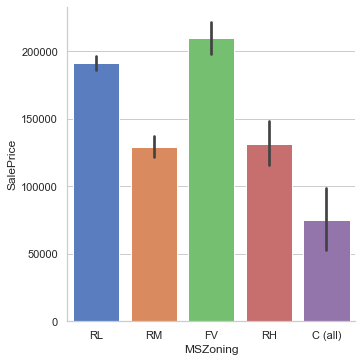

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [98]:
#Factor plot of MSZoning vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=df_train,kind='bar',size=5,palette='muted',aspect=1)

plt.show()


print(df_train.groupby('SalePrice')['MSZoning'].value_counts())

SalePrice is maximum with FV MSZOning.

<Figure size 576x432 with 0 Axes>

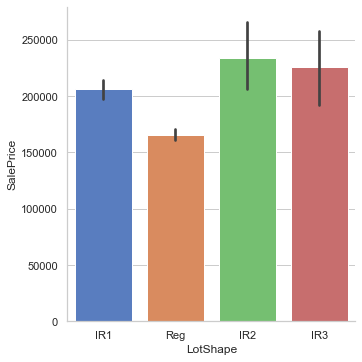

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [100]:
#Factor plot of LotShape vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=df_train,kind='bar',size=5,palette='muted',aspect=1)

plt.show()


print(df_train.groupby('SalePrice')['LotShape'].value_counts())

SalePrice is maximum with IR2 LotShape.

<Figure size 576x432 with 0 Axes>

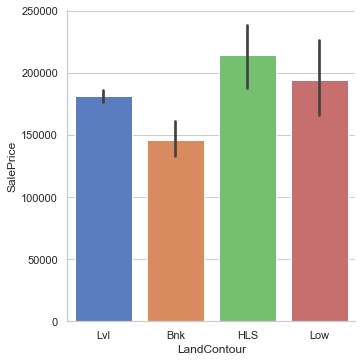

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [102]:
#Factor plot of LandContour vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=df_train,kind='bar',size=5,palette='muted',aspect=1)

plt.show()


print(df_train.groupby('SalePrice')['LandContour'].value_counts())

SalePrice is maximum with HLS LandContour.

<Figure size 576x432 with 0 Axes>

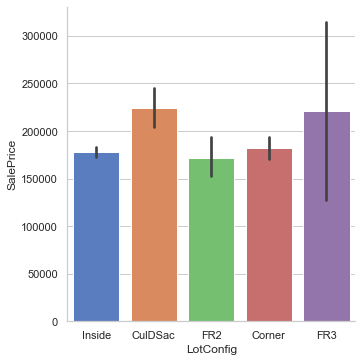

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [104]:
#Factor plot of LotConfig vs SalePrice
plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=df_train,kind='bar',size=5,palette='muted',aspect=1)

plt.show()

print(df_train.groupby('SalePrice')['LotConfig'].value_counts())

SalePrice is maximum with CulDsac LotConfig

<Figure size 1152x1152 with 0 Axes>

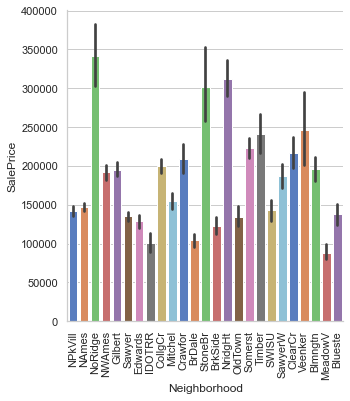

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [107]:
#Factor plot of Neighborhood vs SalePrice
plt.figure(figsize=(16,16))
sns.factorplot(x='Neighborhood',y='SalePrice',data=df_train,kind='bar',size=5,palette='muted',aspect=1)

plt.xticks(rotation='vertical')

plt.show()

print(df_train.groupby('SalePrice')['Neighborhood'].value_counts())

SalePrice is maximum with NoRidge Neighborhood.

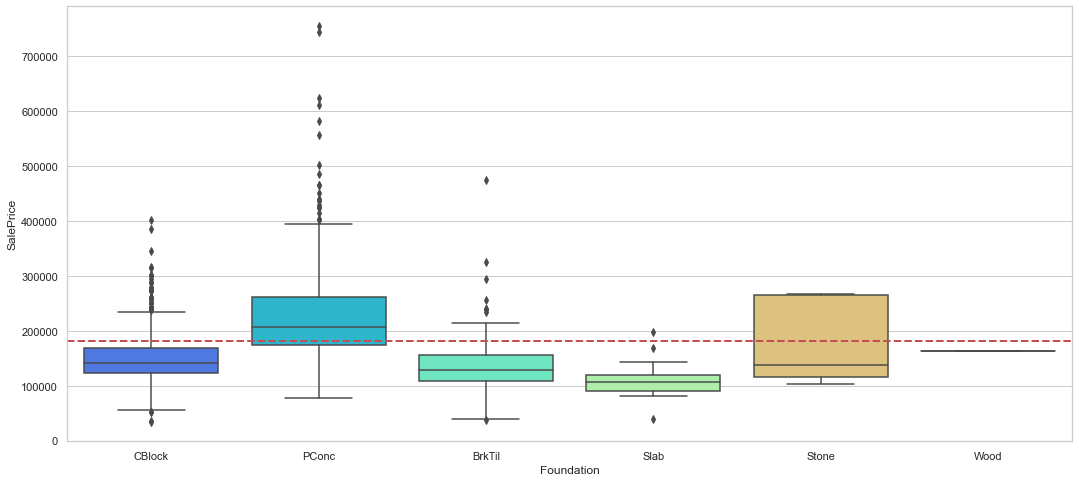

In [109]:
#Foundation vs SalePrice

plt.figure(figsize=(18,8))
mean_price=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='Foundation',data=df_train,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)

plt.show()

SalePrice is maximum with PConc.

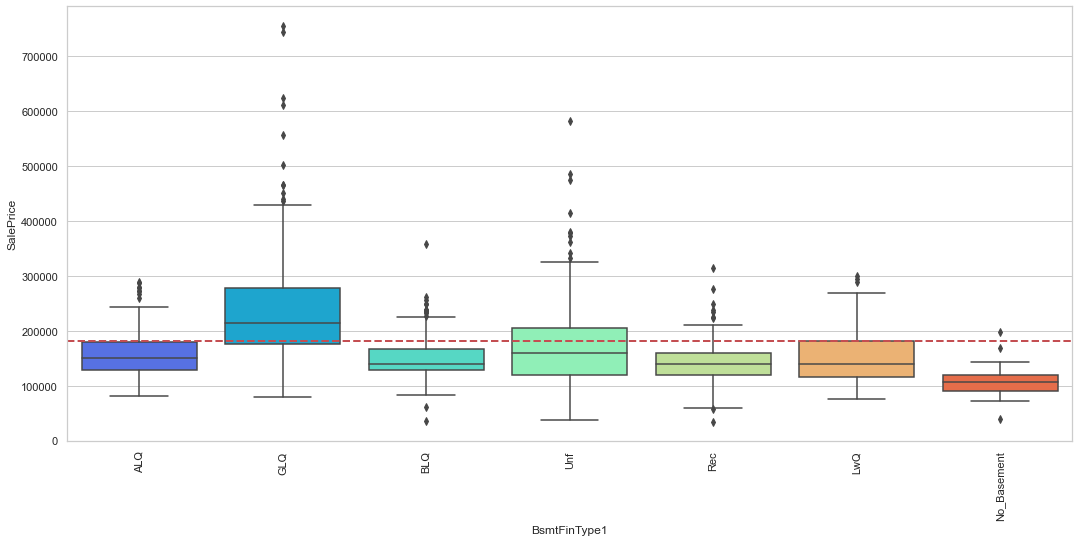

In [112]:
#BsmtFinType1 vs SalePrice

plt.figure(figsize=(18,8))
mean_price=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='BsmtFinType1',data=df_train,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)

plt.xticks(rotation='vertical')
plt.show()

### EDA

In [113]:
# encoding all to numeric values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['MSZoning','Street','Alley', 'LotShape','LandContour','LotConfig','LandSlope', 'Neighborhood','Condition1','Condition2',
       'BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',  'Heating','HeatingQC','CentralAir',
       'Electrical', 'KitchenQual','Functional',  'FireplaceQu', 'GarageType','GarageFinish',  'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature',  'SaleType','SaleCondition', ]
for val in list1:
    df_train[val]=le.fit_transform(df_train[val].astype(str))
    df_test[val]=le.fit_transform(df_test[val].astype(str))

### Checking correlation in train dataset

In [114]:
df_train.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336234 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069476 -0.023328  0.140215   
LotFrontage     -0.336234 -0.069476     1.000000  0.296790 -0.035131   
LotArea         -0.124151 -0.023328     0.296790  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035131 -0.263973  1.000000   
...                   ...       ...          ...       ...       ...   
MoSold          -0.016015 -0.051646     0.022579  0.015141 -0.008860   
YrSold          -0.038595 -0.004964    -0.004162 -0.035399 -0.019635   
SaleType         0.035050  0.079854    -0.036081  0.005421  0.025920   
SaleCondition   -0.028981  0.004501     0.065439  0.034236  0.014176   
SalePrice       -0.060775 -0.133221     0.323851  0.249499  0.044753   

                  Alley  LotShape  LandContour  LotConfig  LandSlope  ...  \
MSSubClass     0.107699  0.104485    -0.021387   0.076880  -0.014930  ...   
MSZoning      -0.415953  0.053655     0.001175  -0.027246  -0.023952  ...   
LotFrontage   -0.084593 -0.138975    -0.073725  -0.189317   0.044283  ...   
LotArea       -0.037048 -0.189201    -0.159038  -0.152063   0.395410  ...   
Street        -0.000978 -0.012941     0.105226   0.000153  -0.141572  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold        -0.025186 -0.050418    -0.023872   0.019084   0.030526  ...   
YrSold         0.010096  0.021421     0.009499  -0.009817  -0.005352  ...   
SaleType       0.008918 -0.015161    -0.041763  -0.002039   0.056004  ...   
SaleCondition -0.000467 -0.054905     0.047715   0.043692  -0.061461  ...   
SalePrice      0.076717 -0.248171     0.032836  -0.060452   0.015485  ...   

               3SsnPorch  ScreenPorch     Fence  MiscFeature   MiscVal  \
MSSubClass     -0.043210    -0.013291  0.112138    -0.049530 -0.023503   
MSZoning        0.004409     0.030793 -0.070105    -0.011200  0.003416   
LotFrontage     0.050499     0.030440 -0.052882    -0.001235 -0.002830   
LotArea         0.025794     0.025256  0.030193     0.147387  0.051679   
Street          0.007338     0.016026 -0.027677    -0.222166 -0.030354   
...                  ...          ...       ...          ...       ...   
MoSold          0.020406     0.033064 -0.004882     0.020095 -0.008773   
YrSold          0.014440     0.017312 -0.041525     0.042696 -0.008439   
SaleType       -0.013696     0.010760 -0.000235    -0.011484  0.015900   
SaleCondition   0.001236     0.002670  0.107588    -0.018463  0.012178   
SalePrice       0.060119     0.100284  0.143922    -0.063477 -0.013071   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
MSSubClass    -0.016015 -0.038595  0.035050      -0.028981  -0.060775  
MSZoning      -0.051646 -0.004964  0.079854       0.004501  -0.133221  
LotFrontage    0.022579 -0.004162 -0.036081       0.065439   0.323851  
LotArea        0.015141 -0.035399  0.005421       0.034236   0.249499  
Street        -0.008860 -0.019635  0.025920       0.014176   0.044753  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.144536 -0.063667      -0.003462   0.072764  
YrSold        -0.144536  1.000000  0.013606       0.024505  -0.045508  
SaleType      -0.063667  0.013606  1.000000       0.143557  -0.050851  
SaleCondition -0.003462  0.024505  0.143557       1.000000   0.217687  
SalePrice      0.072764 -0.045508 -0.050851       0.217687   1.000000  

[77 rows x 77 columns]

### Using Heatmap to showing Test dataset

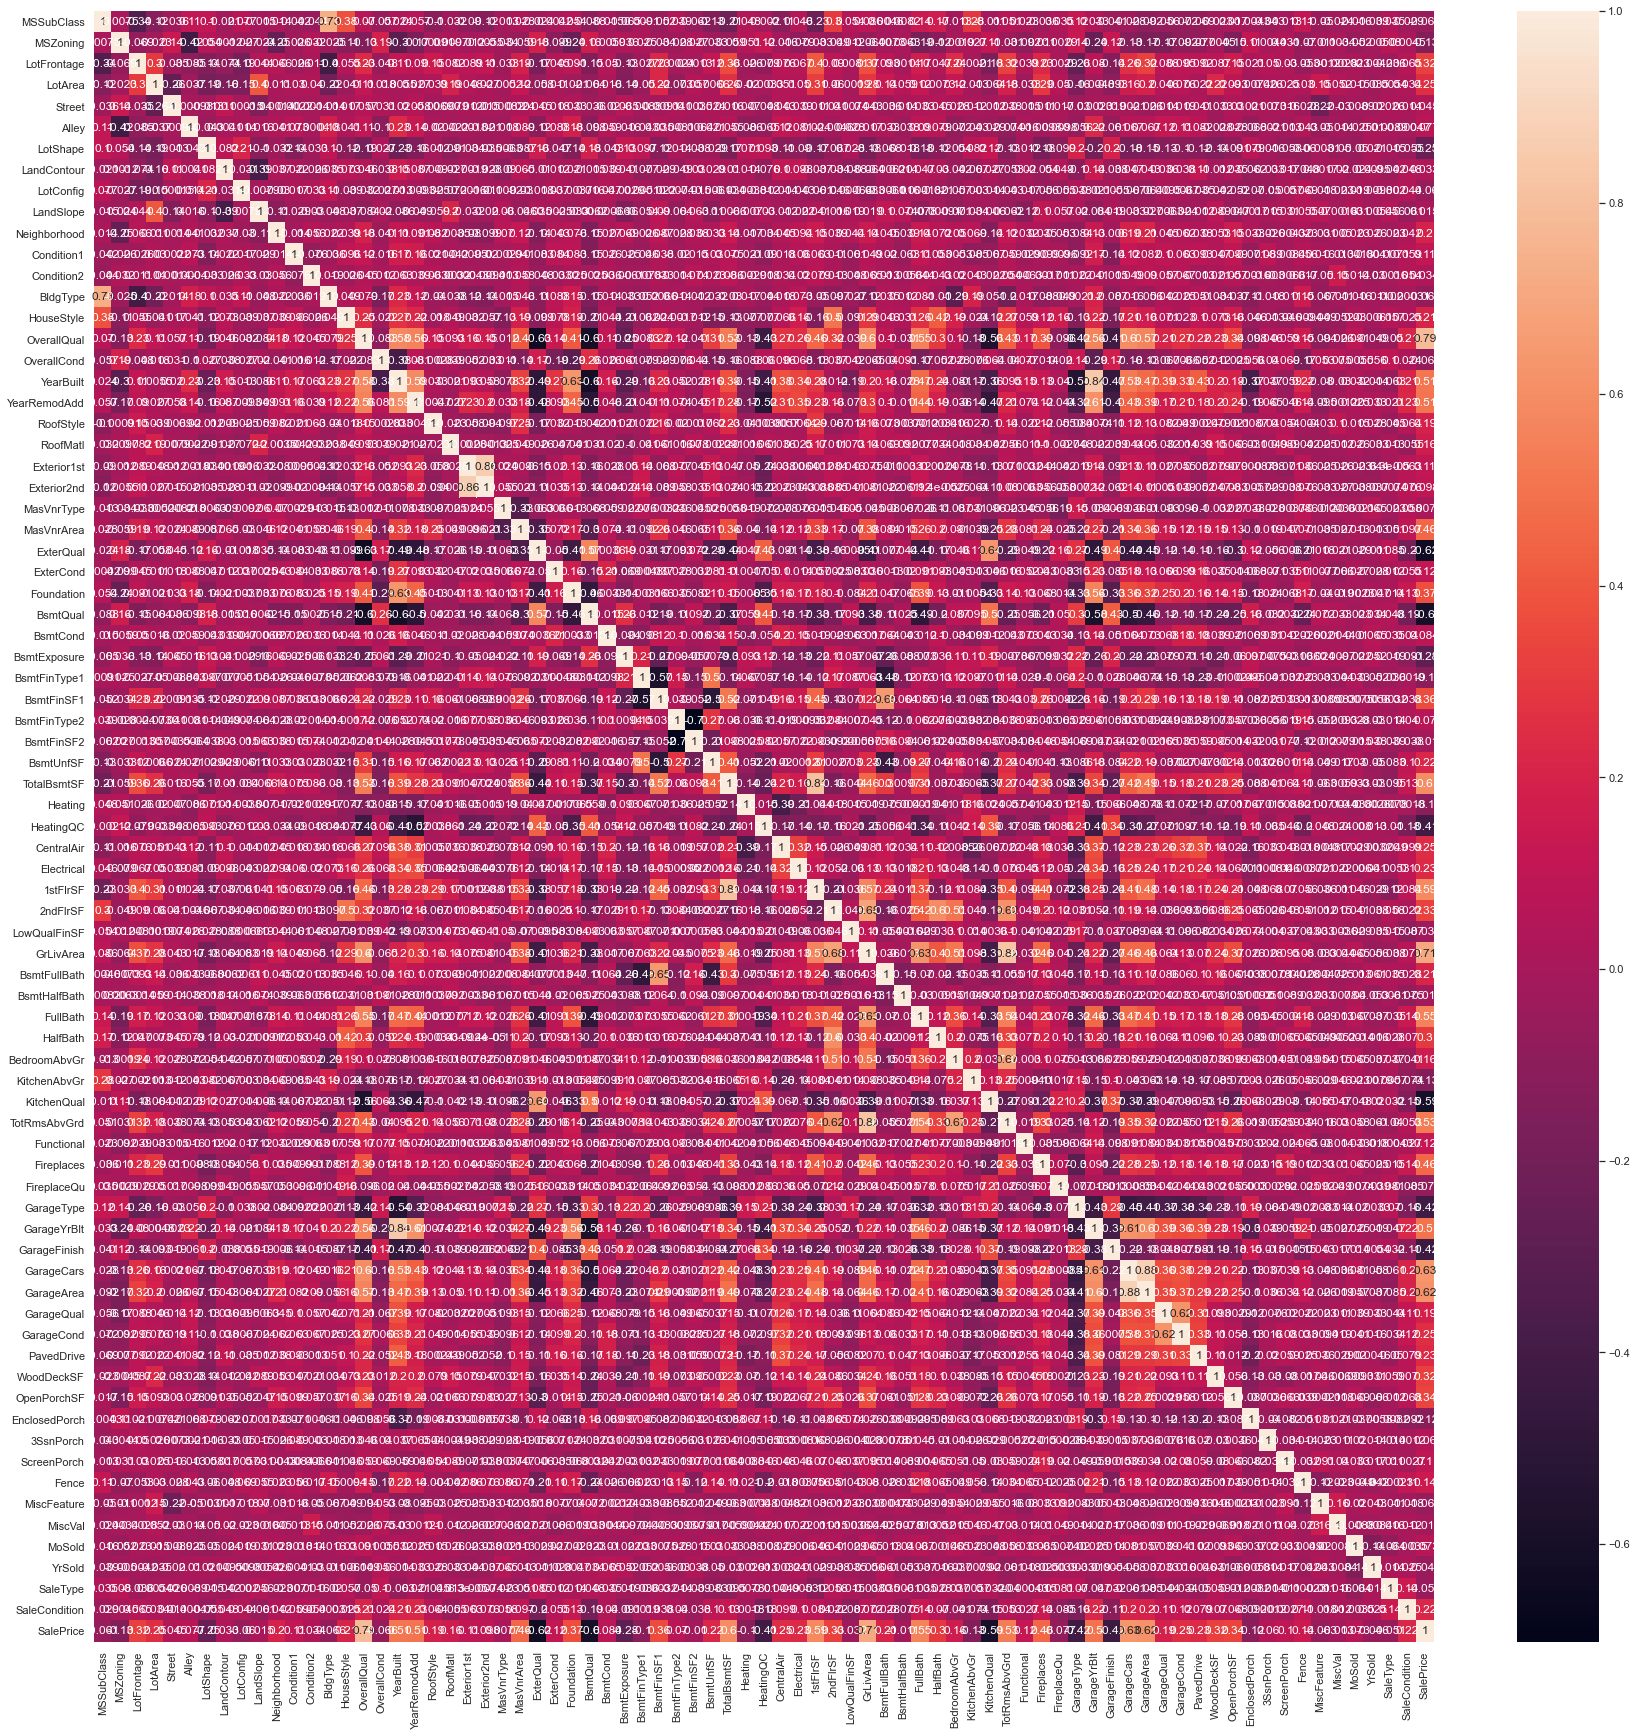

In [115]:
import seaborn as sns
corr_hmap = df_train.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Checking correlation in test dataset

In [116]:
df_test.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.266517    -0.452626 -0.186654  0.004588   
MSZoning         0.266517  1.000000    -0.340398 -0.117968 -0.063162   
LotFrontage     -0.452626 -0.340398     1.000000  0.372005 -0.054124   
LotArea         -0.186654 -0.117968     0.372005  1.000000 -0.069626   
Street           0.004588 -0.063162    -0.054124 -0.069626  1.000000   
...                   ...       ...          ...       ...       ...   
MiscVal          0.137542  0.090554     0.031177 -0.020398  0.010465   
MoSold          -0.004079  0.074308    -0.049768 -0.034709  0.036965   
YrSold           0.044441 -0.072716     0.062552  0.041735 -0.040272   
SaleType        -0.105307  0.123993     0.032913  0.037096 -0.019125   
SaleCondition   -0.010155  0.005290     0.033743  0.030689 -0.012345   

                  Alley  LotShape  LandContour  LotConfig  LandSlope  ...  \
MSSubClass     0.064418  0.176681     0.068736   0.071784  -0.073979  ...   
MSZoning      -0.113341  0.167716    -0.099137   0.055261  -0.035312  ...   
LotFrontage    0.030509 -0.170728    -0.082120  -0.137169   0.184979  ...   
LotArea       -0.009513 -0.110574    -0.131482  -0.042599   0.620079  ...   
Street        -0.005206 -0.002444     0.153613   0.058229  -0.324146  ...   
...                 ...       ...          ...        ...        ...  ...   
MiscVal       -0.023631  0.017304     0.037718   0.029676  -0.028515  ...   
MoSold         0.050533  0.033461     0.037564   0.019805  -0.100718  ...   
YrSold         0.040801  0.097144     0.064777   0.008814   0.013349  ...   
SaleType      -0.035511  0.072375     0.056451   0.104593   0.052109  ...   
SaleCondition  0.017891  0.033945    -0.027454   0.092637   0.033637  ...   

               EnclosedPorch  3SsnPorch  ScreenPorch     Fence  MiscFeature  \
MSSubClass         -0.047570  -0.045672    -0.072139 -0.029287    -0.036019   
MSZoning            0.183748  -0.023665    -0.059479 -0.029749     0.008145   
LotFrontage        -0.067476   0.109017     0.069423  0.071272     0.057516   
LotArea            -0.055667   0.007832     0.090367  0.057443    -0.004549   
Street              0.028389   0.006847    -0.165571 -0.032991     0.015440   
...                      ...        ...          ...       ...          ...   
MiscVal            -0.020024   0.103201    -0.032592 -0.049730     0.543616   
MoSold              0.003169   0.062146    -0.012744 -0.027882    -0.012099   
YrSold             -0.027079   0.036249    -0.014433 -0.012157     0.123508   
SaleType           -0.065219   0.018988    -0.032347 -0.062344     0.042817   
SaleCondition      -0.129965   0.012257    -0.112899  0.078899     0.027639   

                MiscVal    MoSold    YrSold  SaleType  SaleCondition  
MSSubClass     0.137542 -0.004079  0.044441 -0.105307      -0.010155  
MSZoning       0.090554  0.074308 -0.072716  0.123993       0.005290  
LotFrontage    0.031177 -0.049768  0.062552  0.032913       0.033743  
LotArea       -0.020398 -0.034709  0.041735  0.037096       0.030689  
Street         0.010465  0.036965 -0.040272 -0.019125      -0.012345  
...                 ...       ...       ...       ...            ...  
MiscVal        1.000000  0.009583  0.140017  0.029021       0.018734  
MoSold         0.009583  1.000000 -0.149289  0.044305       0.087636  
YrSold         0.140017 -0.149289  1.000000 -0.097726      -0.083345  
SaleType       0.029021  0.044305 -0.097726  1.000000       0.349621  
SaleCondition  0.018734  0.087636 -0.083345  0.349621       1.000000  

[76 rows x 76 columns]

###  Using Heatmap to showing Test dataset

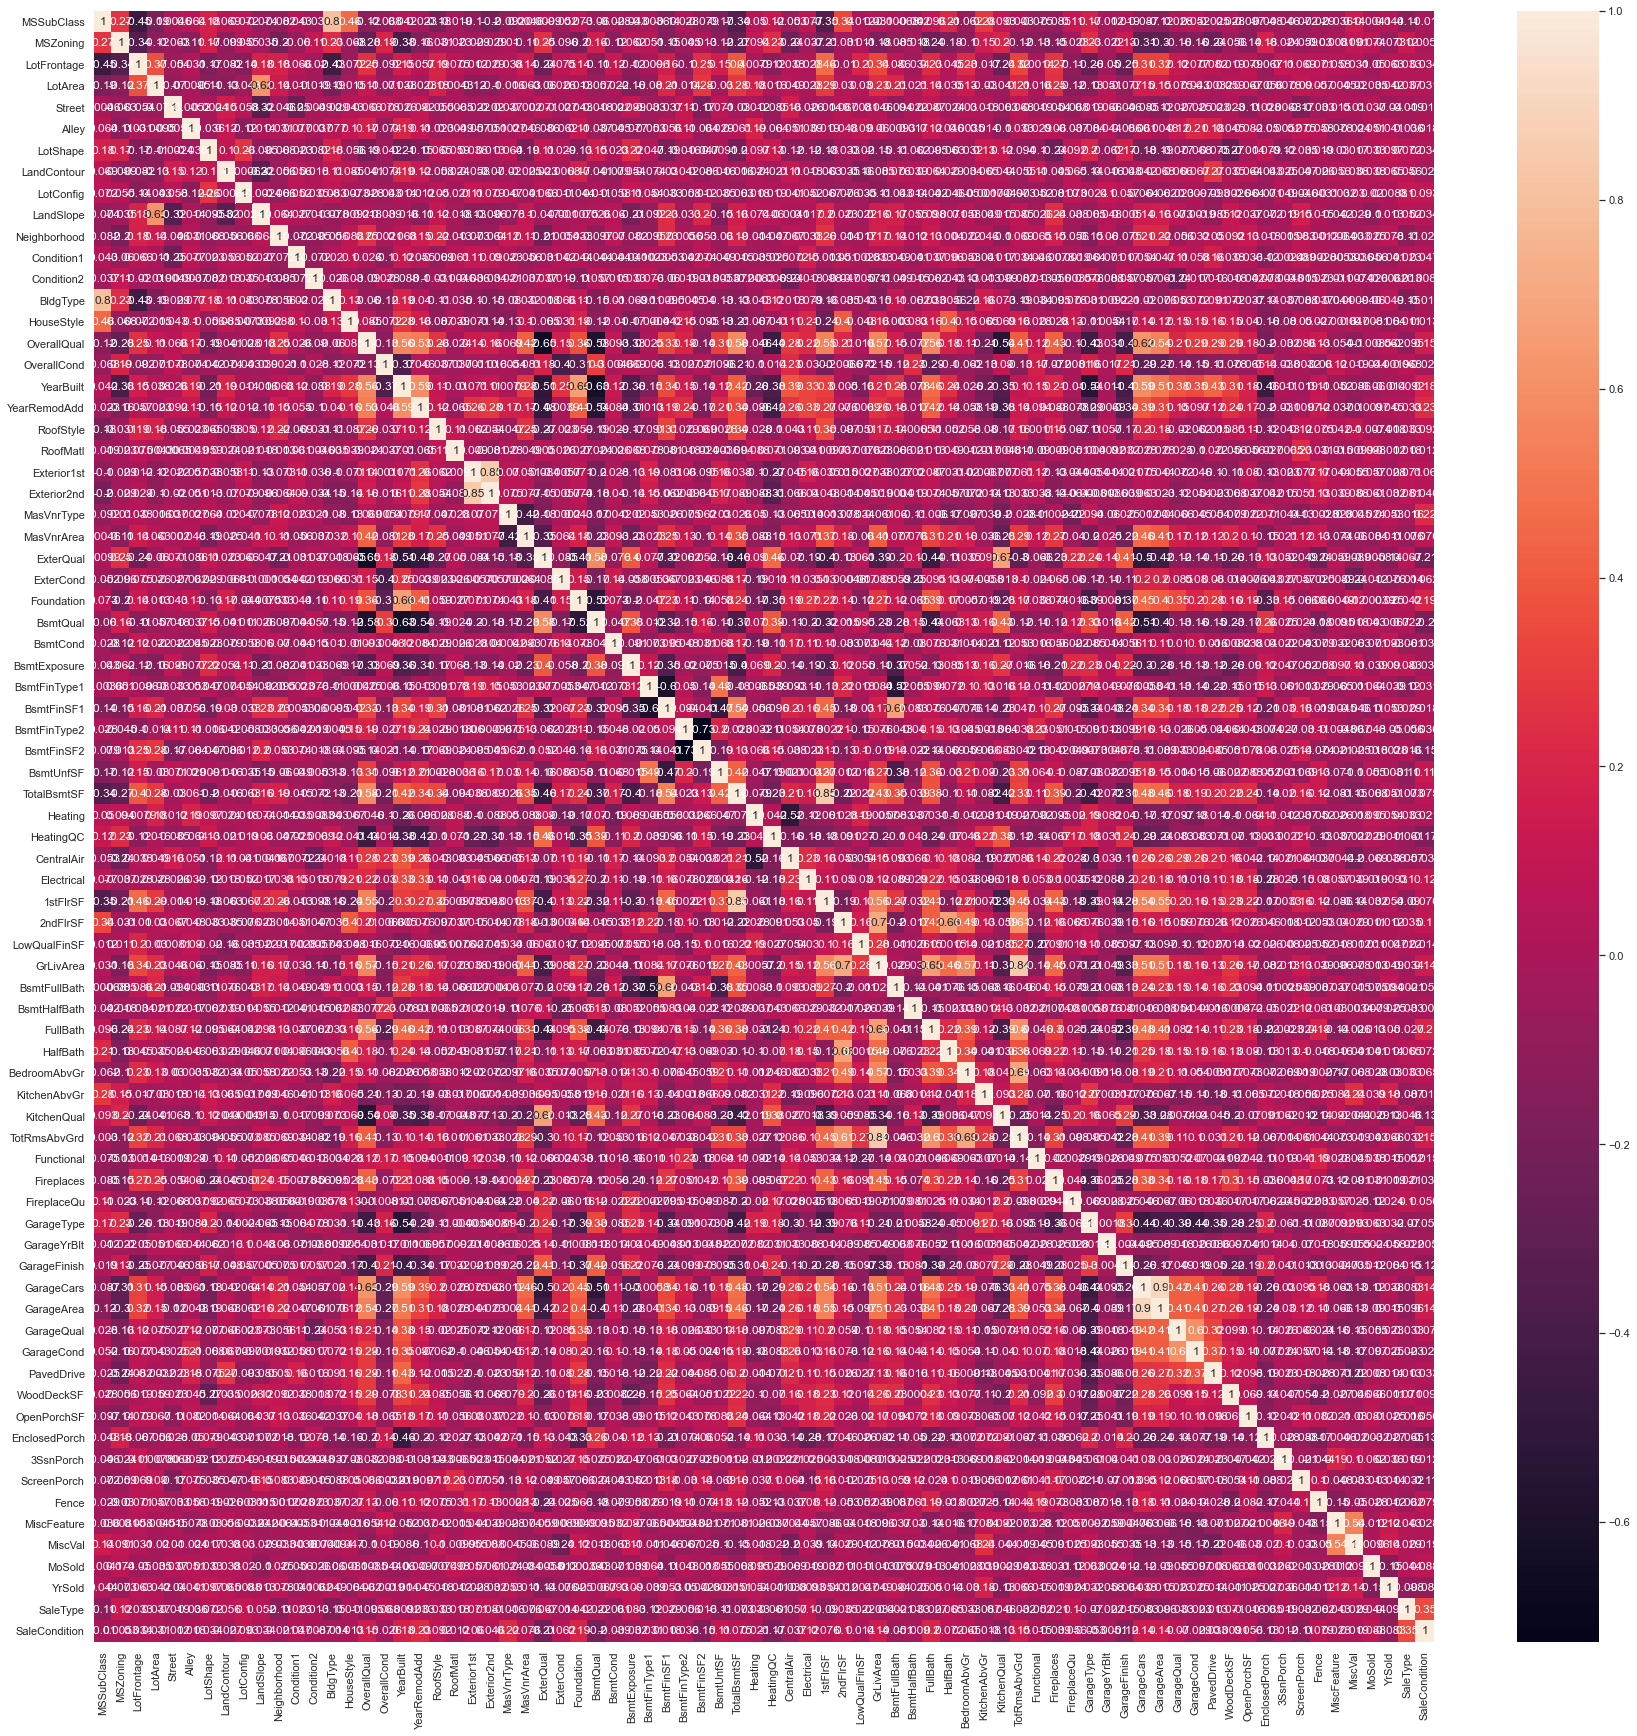

In [117]:
corr_hmap = df_test.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Checking Outliers

#### first check train dataset

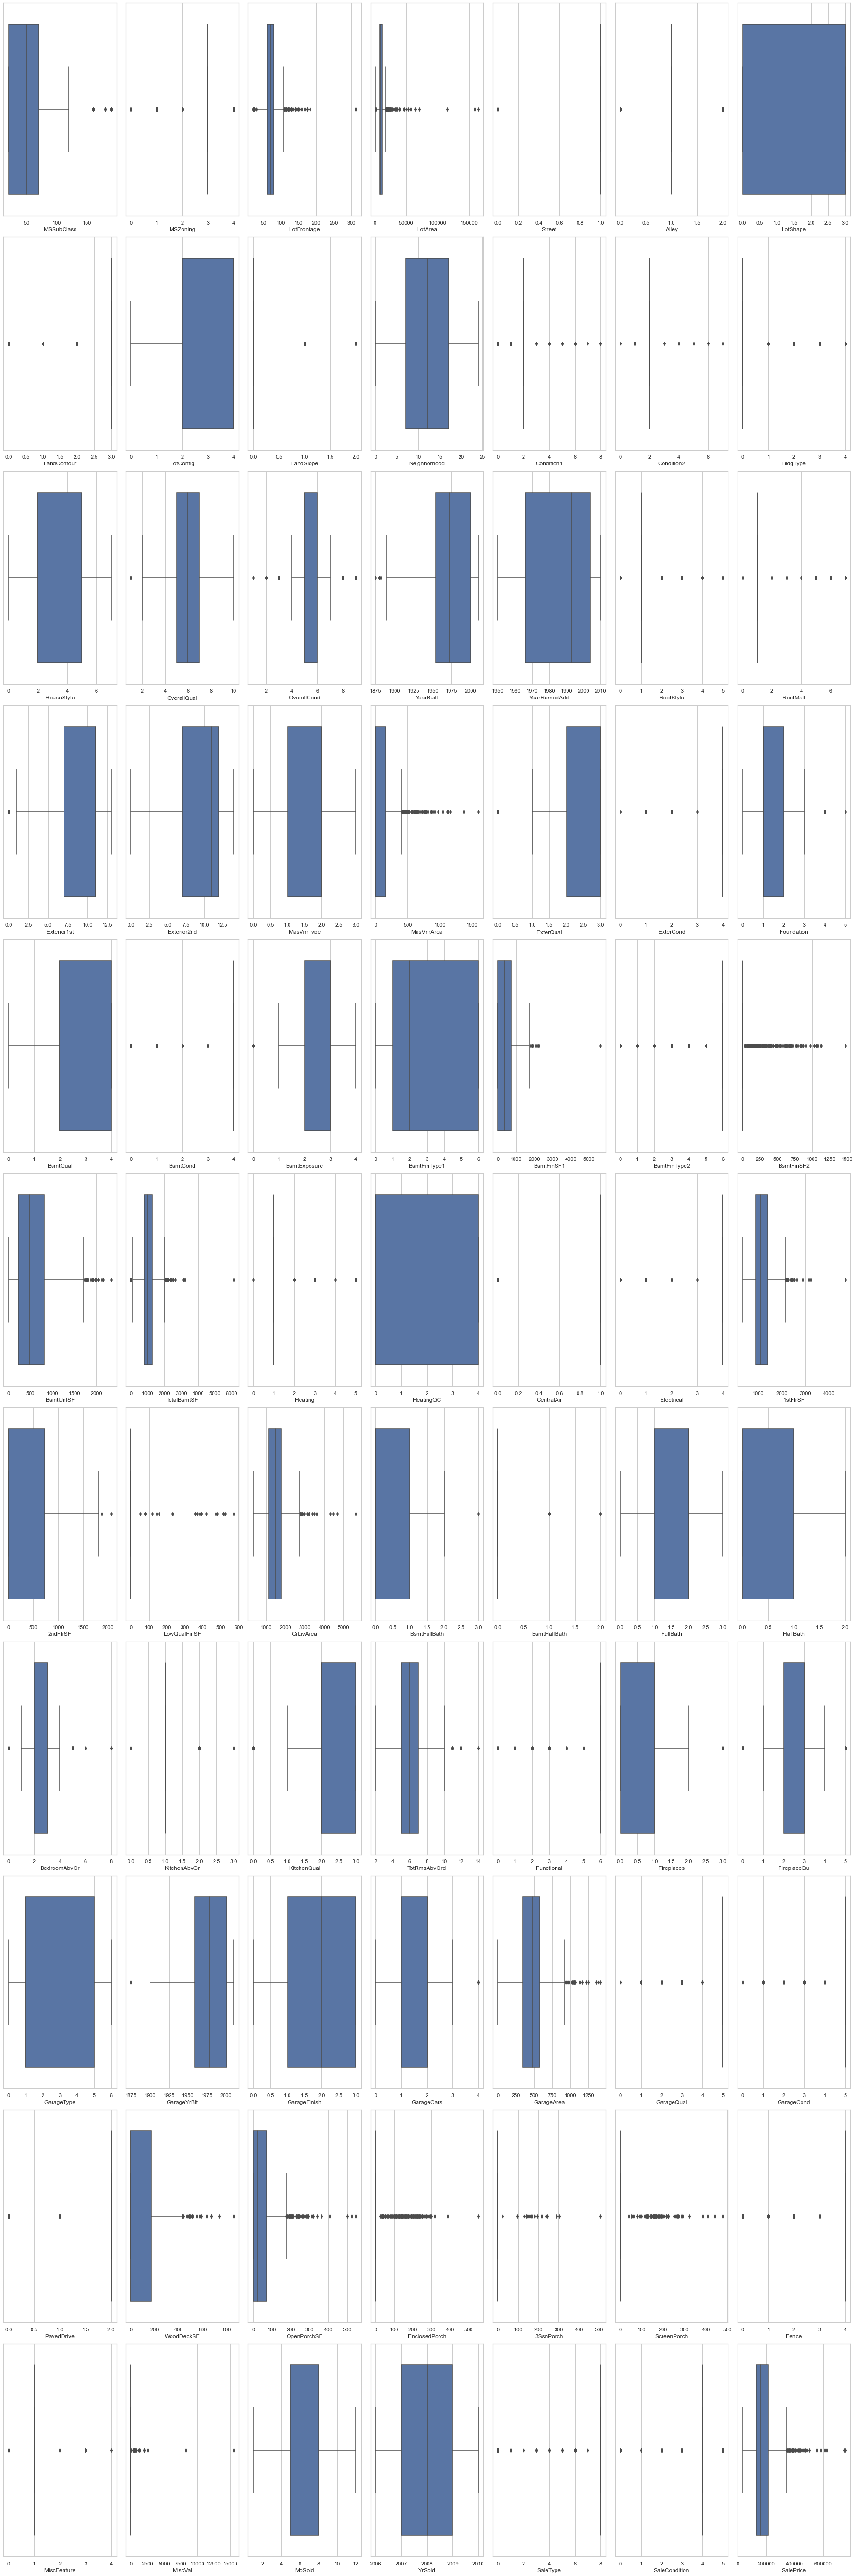

In [118]:
collist=df_train.columns.values
ncol=7
nrow=11

plt.figure(figsize=(25, 75))
plt.rcParams.update({'font.size': 10})
for i in range(0, len(collist)):
    plt.subplot(nrow, ncol, i+1)
    sns.boxplot(df_train[collist[i]], orient='v')
    plt.tight_layout()

Skewness Present in our Train data set

#### for test dataset

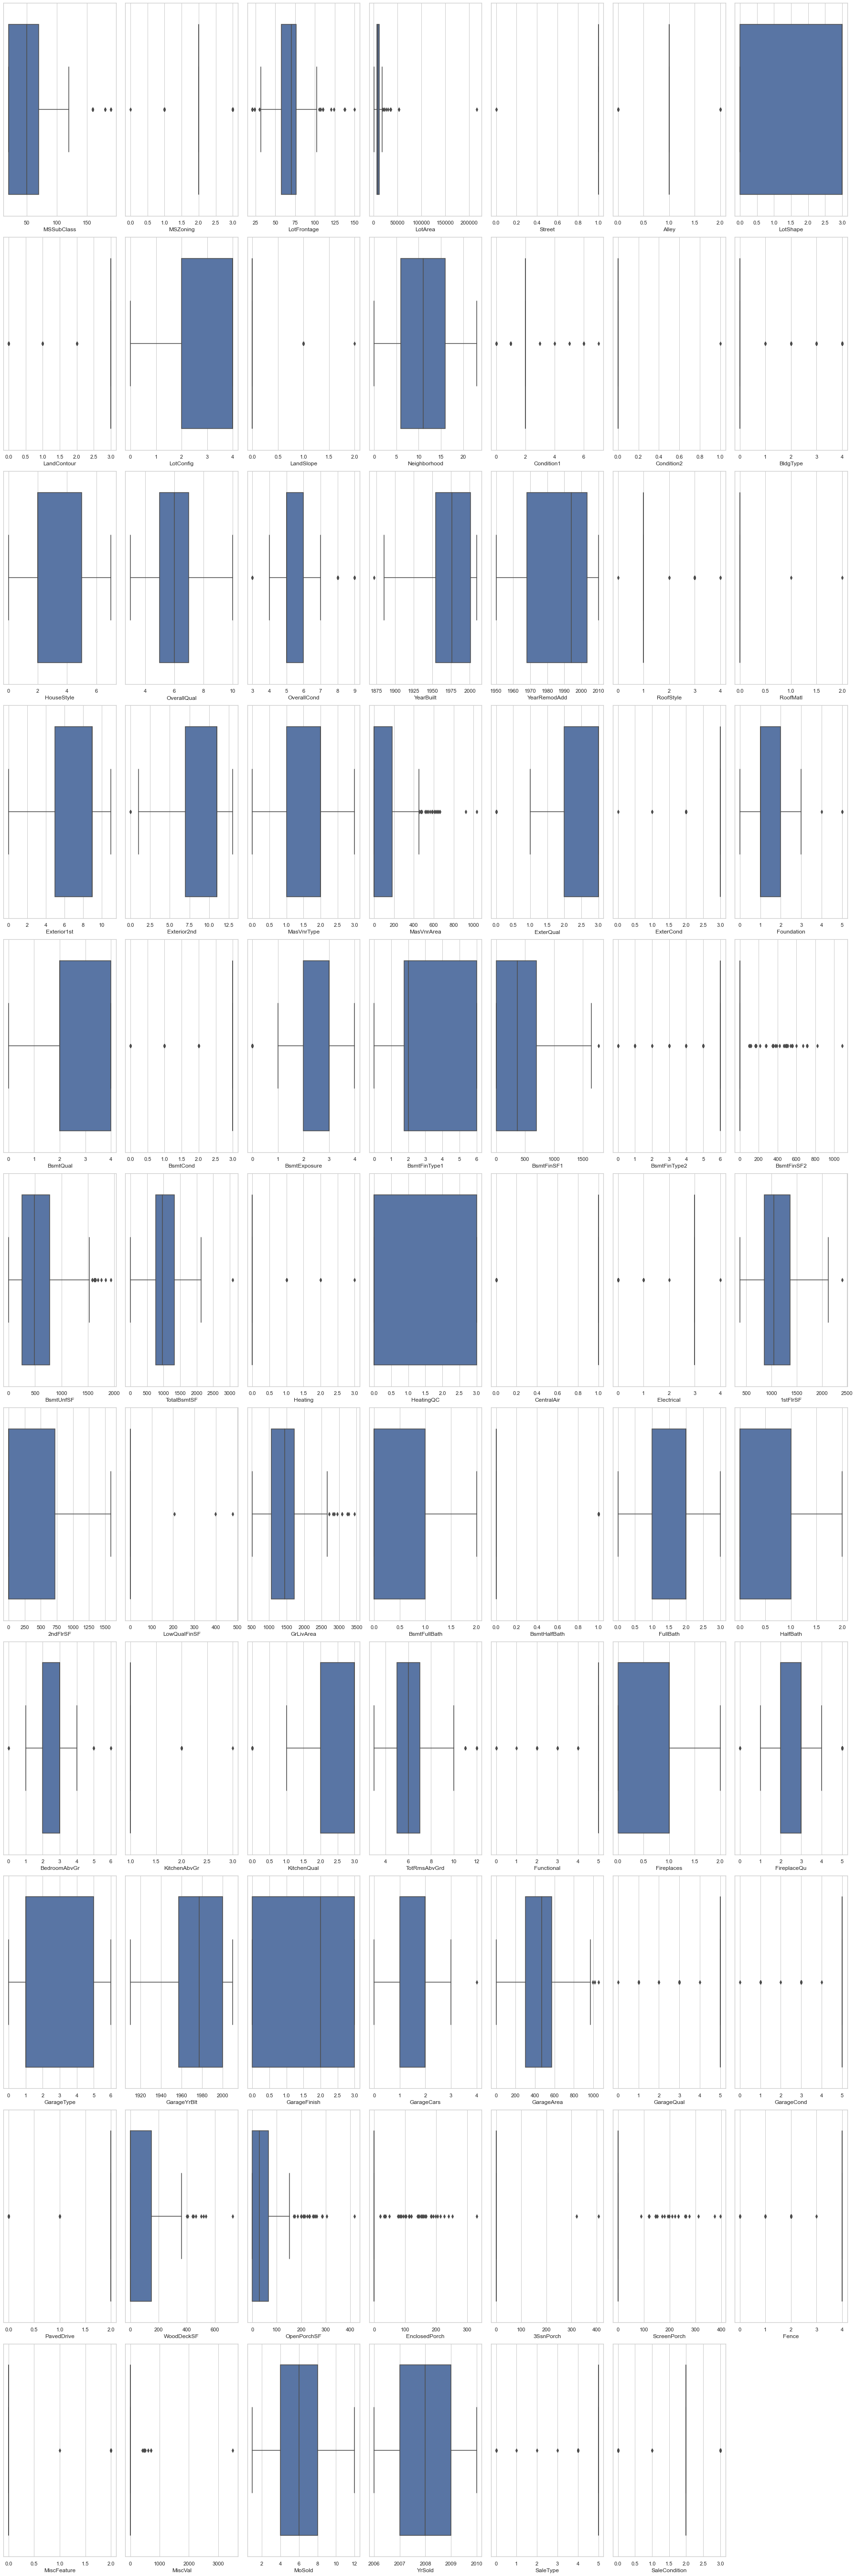

In [119]:
collist=df_test.columns.values
ncol=7
nrow=11

plt.figure(figsize=(25, 75))
plt.rcParams.update({'font.size': 10})
for i in range(0, len(collist)):
    plt.subplot(nrow, ncol, i+1)
    sns.boxplot(df_test[collist[i]], orient='v')
    plt.tight_layout()

Skewness Present in our Test data set

### Plotting Histogram

#### For train dataset


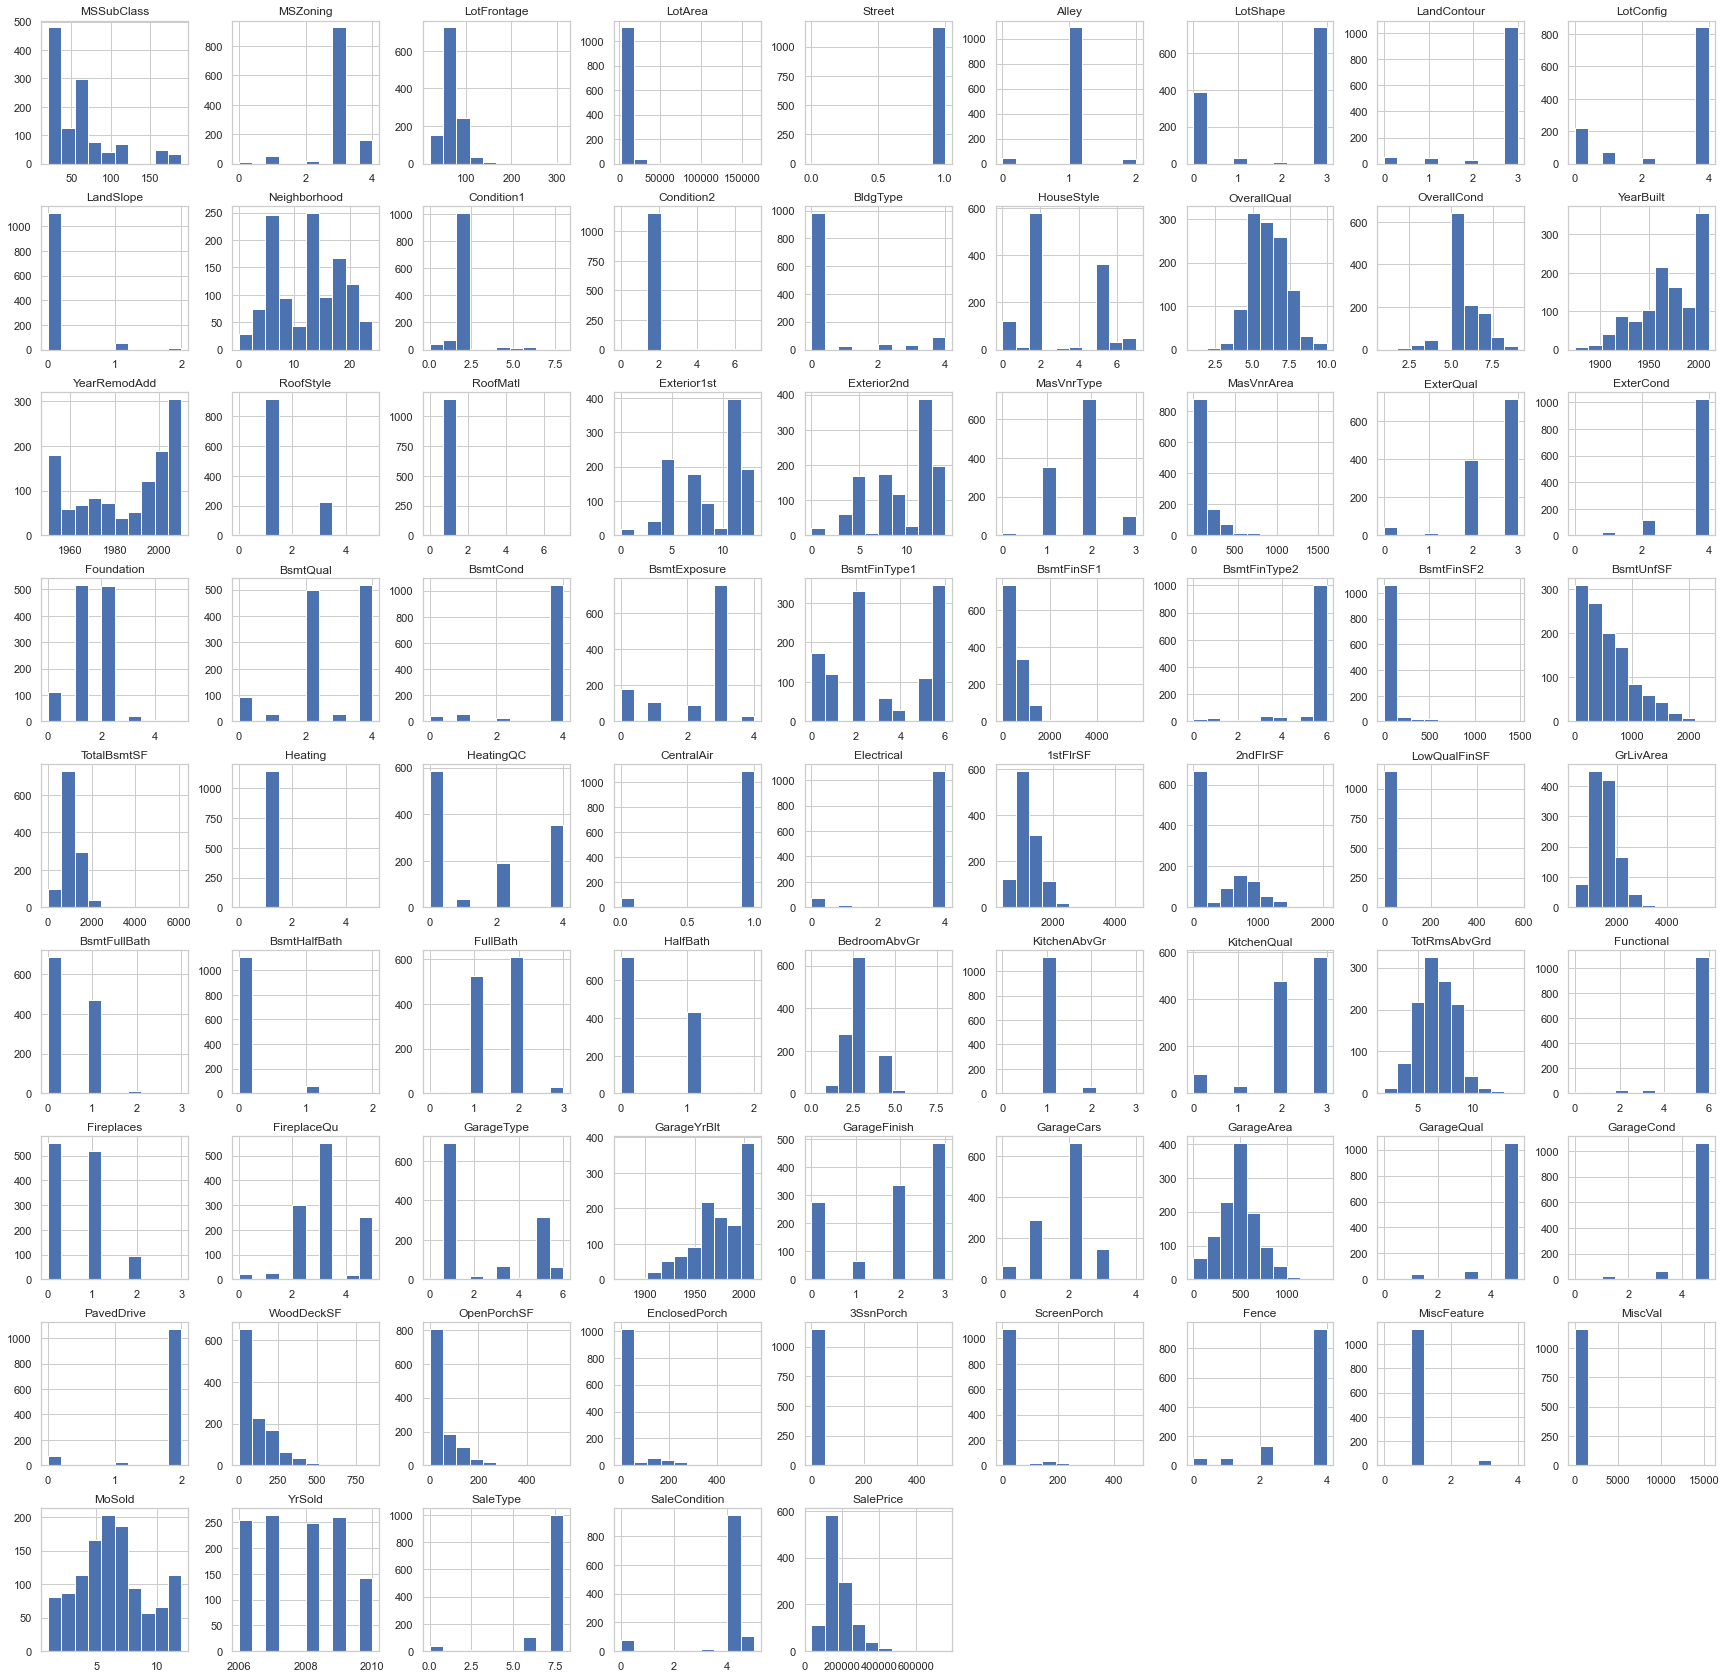

In [122]:
df_train.hist(figsize=(30,30));

#### For test dataset

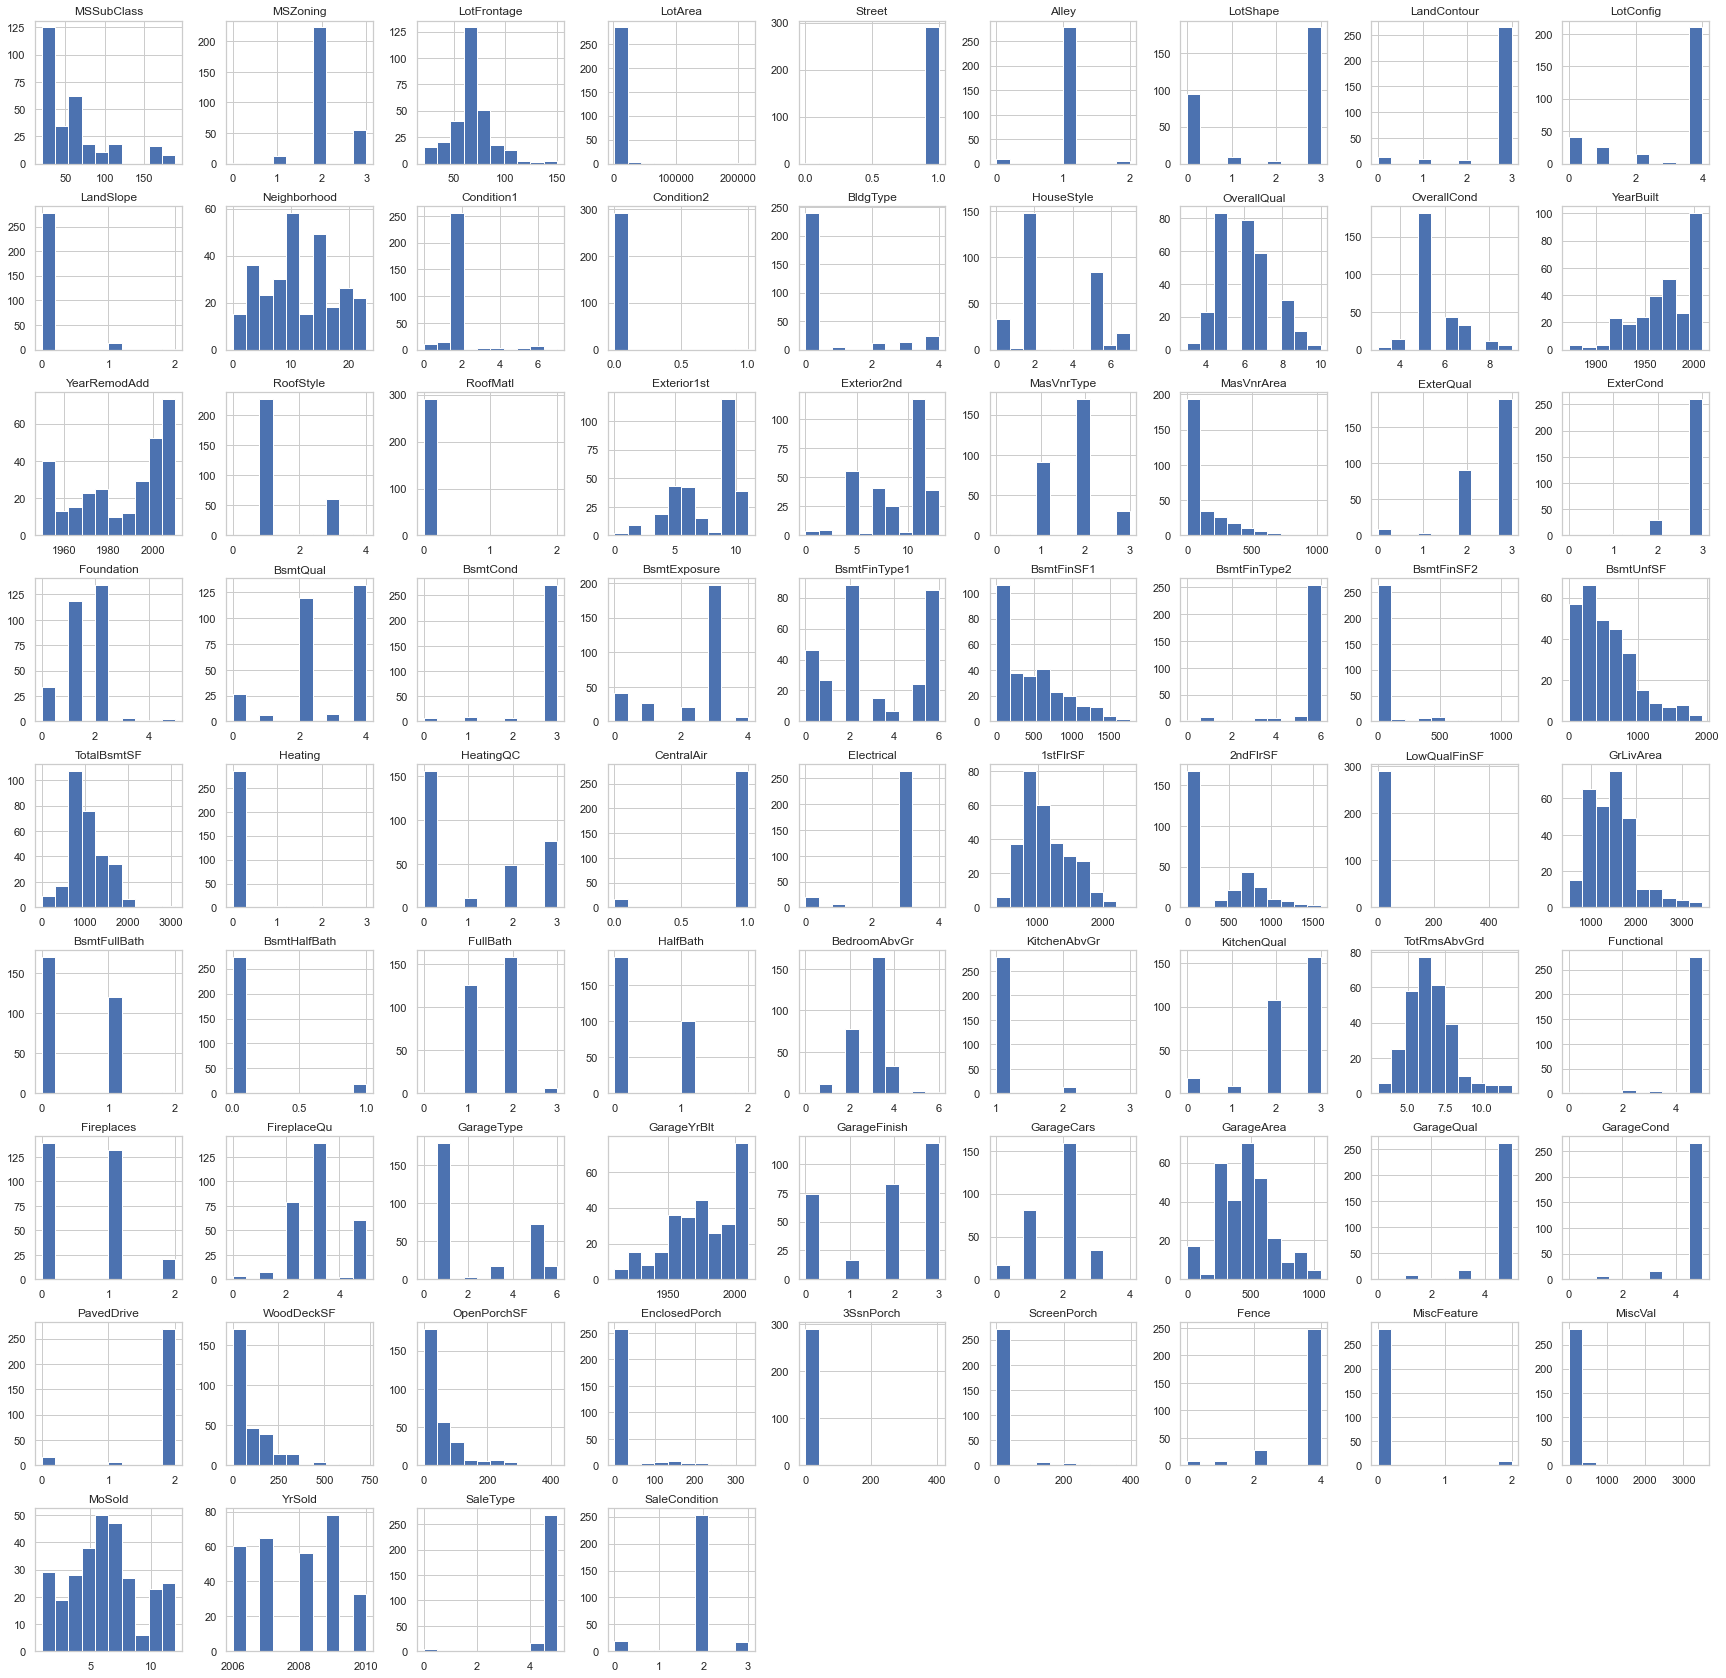

In [121]:
df_test.hist(figsize=(30,30));

### Checking skewness

In [123]:
df_train.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.733440
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 77, dtype: float64

In [124]:
# splitting the data for training and test
df_x=df_train.drop(columns=['SalePrice'])
y= df_train['SalePrice']

In [125]:
# Treating skewness for train dataset
df_x.skew()
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]= np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col] = np.sqrt(df_x[col])

In [126]:
# checking skewness again
df_x.skew()

MSSubClass        0.757142
MSZoning         -3.778820
LotFrontage       0.568117
LotArea           3.659306
Street          -17.021969
                   ...    
MiscVal           9.711267
MoSold            0.220979
YrSold            0.115765
SaleType         -4.476868
SaleCondition    -3.149161
Length: 76, dtype: float64

#### For test datset

In [127]:
df_test.skew()

MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.381625
LotArea          12.781805
Street          -12.020386
                   ...    
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
SaleType         -5.489874
SaleCondition    -2.161104
Length: 76, dtype: float64

In [128]:
#Treating the skewness
df_test.skew()
for col in df_test.skew().index:
    if col in df_test.describe().columns:
        if df_test[col].skew()>0.55:
            df_test[col]= np.sqrt(df_test[col])
            
        if df_test[col].skew()<-0.55:
            df_test[col] = np.sqrt(df_test[col])
        
            
        

In [129]:
#checking skewness again
df_test.skew()

MSSubClass        0.783807
MSZoning          0.187174
LotFrontage       0.381625
LotArea           5.201616
Street          -12.020386
                   ...    
MiscVal           7.099036
MoSold            0.186504
YrSold            0.018412
SaleType         -6.468034
SaleCondition    -3.123077
Length: 76, dtype: float64

Now Skewness Remove Both Train and test dataset

### Scaling the dataset

#### For Train datset

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train= scaler.fit_transform(df_train)

#### For Testing dataset

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test=scaler.fit_transform(df_test)

### Applying PCA

#### For train dataset

In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
df_train= pca.fit_transform(df_train)

#### For test dataset

In [141]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
df_test= pca.fit_transform(df_test)

### Sending the Train Dataset for Model Training

In [142]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [143]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=40)

In [148]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [153]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    r2_scr = r2_score(y_test,pred)
    if r2_scr>max_score:
        max_score=r2_scr
        final_r_state=r_state
        
print('Maximum r2 score is ',max_score,"at",final_r_state)

Maximum r2 score is  0.8625906908139505 at 48


#### Now Using 48 Random state in our datset

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=49)
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Results of ",m," is")
    predm=m.predict(x_test)
    print("R2 Score:",r2_score(y_test,predm))
    print("Error:")
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("**************************************************************************************************")
    print('\n')

Results of  LinearRegression()  is
R2 Score: 0.8656640467909524
Error:
Root Mean Squared Error: 28655.344722010323
**************************************************************************************************


Results of  Lasso()  is
R2 Score: 0.8656644527845043
Error:
Root Mean Squared Error: 28655.301420519932
**************************************************************************************************


Results of  Ridge()  is
R2 Score: 0.8656657774569141
Error:
Root Mean Squared Error: 28655.160136319468
**************************************************************************************************


Results of  ElasticNet()  is
R2 Score: 0.86128747222151
Error:
Root Mean Squared Error: 29118.389411099437
**************************************************************************************************


Results of  DecisionTreeRegressor()  is
R2 Score: 0.7883088749873999
Error:
Root Mean Squared Error: 35971.68918217043
***********************************************

### Cross Validation

In [162]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),KNeighborsRegressor()]
for m in model:
    score = cross_val_score(m,x,y,cv=10,scoring='r2')
    print('score of',m,'is:')
    print('\n')
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('\n')
    print("------------------------------------------------------------------------------------------------")
    print('\n')

score of LinearRegression() is:


Score: [0.86284946 0.7826754  0.82799442 0.70589998 0.85764929 0.58742466
 0.87530393 0.82953919 0.80372192 0.81985987]
Mean Score: 0.7952918123792909
Standard deviation: 0.08314460533102995


------------------------------------------------------------------------------------------------


score of Lasso() is:


Score: [0.86284567 0.78267372 0.82799157 0.70590683 0.85764833 0.58742961
 0.87530514 0.82954194 0.80372173 0.8198627 ]
Mean Score: 0.7952927242259105
Standard deviation: 0.08314247811380336


------------------------------------------------------------------------------------------------


score of Ridge() is:


Score: [0.86284258 0.78266667 0.82796377 0.70595507 0.85765455 0.5874643
 0.87529982 0.82952802 0.80372007 0.81987614]
Mean Score: 0.7952970988951689
Standard deviation: 0.08312714399280709


------------------------------------------------------------------------------------------------


score of ElasticNet() is:


Score: [0.8551832

### Using Some Ensemble Techniques to boost the score

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [168]:
model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),XGBRegressor()]

for m in model:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print('Result for Model ',m,'is')
    print('R2 Score:',r2_score(y_test,pred))
    print('Error')
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
    print("--------------------------------------------------------------------")
    print('\n')

Result for Model  RandomForestRegressor() is
R2 Score: 0.8678520259921512
Error
Root Mean Squared Error: 28421.026616200837
--------------------------------------------------------------------


Result for Model  AdaBoostRegressor() is
R2 Score: 0.8014667675095024
Error
Root Mean Squared Error: 34835.826076194986
--------------------------------------------------------------------


Result for Model  GradientBoostingRegressor() is
R2 Score: 0.8737019196779476
Error
Root Mean Squared Error: 27784.838799802063
--------------------------------------------------------------------


Result for Model  ExtraTreesRegressor() is
R2 Score: 0.8758749510537106
Error
Root Mean Squared Error: 27544.77461380361
--------------------------------------------------------------------


Result for Model  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',

### Cross Validation

In [171]:
from sklearn.model_selection import cross_val_score
model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),XGBRegressor()]
for m in model:
    score = cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Score of ',m,'is')
    print('\n')
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('\n')
    print('--------------------------------------------------------------------------')
    print('\n')

Score of  RandomForestRegressor() is


Score: [0.84371099 0.85038693 0.86564319 0.61190604 0.87141022 0.60067749
 0.81343065 0.89369233 0.81323957 0.83685296]
Mean Score: 0.8000950379001461
Standard deviation: 0.09972898958114909


--------------------------------------------------------------------------


Score of  AdaBoostRegressor() is


Score: [0.77495319 0.85555815 0.79086618 0.57884921 0.80954463 0.65785827
 0.7835108  0.84020184 0.73871521 0.70713728]
Mean Score: 0.7537194764127096
Standard deviation: 0.08114742403584799


--------------------------------------------------------------------------


Score of  GradientBoostingRegressor() is


Score: [0.84819418 0.8617798  0.87435836 0.580362   0.88492131 0.51274234
 0.80200771 0.87302433 0.80660958 0.83888298]
Mean Score: 0.7882882599709109
Standard deviation: 0.1245626505983516


--------------------------------------------------------------------------


Score of  ExtraTreesRegressor() is


Score: [0.84269778 0.89115608 0.86163

### Hyperparameter Tuning using GridsearchCV

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
# finding best parameter for Lasso using GridSearchCV

lasso= Lasso()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf= GridSearchCV(lasso,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [174]:
# lasso model
lasso = Lasso(alpha=1,random_state=42)
lasso.fit(x_train,y_train)
pred = lasso.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


R2 Score: 0.8656644527845043
Root Mean Squared Error: 28655.301420519932


In [175]:
# finding best parameter for Ridge using GridSearchCV
ridge = Ridge()
parameters = {'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf = GridSearchCV(ridge,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [176]:
ridge = Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 0.8656657774569141
Root Mean Squared Error: 28655.160136319468


In [180]:
# finding its best parameter for Gradientboosting using GridSearchCV
gbr=GradientBoostingRegressor()
estimator={'n_estimators':[100,200,300]}
clf=GridSearchCV(gbr,estimator)
clf.fit(x_train,y_train)
clf.best_params_

{'n_estimators': 300}

In [181]:
gbr=GradientBoostingRegressor(n_estimators=300)
gbr.fit(x_train,y_train)
pred =gbr.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('Root Mean Squared:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 0.8653852981585504
Root Mean Squared: 28685.059398703284


In [182]:
# finding its best parameter for Random Forest using GridSearchCV
rfr=RandomForestRegressor()
parameters={'n_estimators':[50,100,150,200]}
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'n_estimators': 100}

In [184]:
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print("R2 Score:",r2_score(y_test,predrfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

R2 Score: 0.8617269354617404
Root Mean Squared Error: 29072.226986706442


### Best Model

In [186]:
gbr=GradientBoostingRegressor(n_estimators=300)
gbr.fit(x_train,y_train)
pred =gbr.predict(x_test)
print('R2 Score:',r2_score(y_test,pred))
print('Root Mean Squared:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 0.8649097576269652
Root Mean Squared: 28735.681219559294


In [188]:
# Cross validation
from sklearn.model_selection import cross_val_score

Score =cross_val_score(gbr,x,y,cv=10)
print(Score)
print(Score.mean(),Score.std())

[0.85093335 0.86615723 0.86194614 0.60046476 0.87841979 0.48235916
 0.78722669 0.86520537 0.7880395  0.83809858]
0.7818850582933712 0.12664751597674556


### Saving the Model

In [189]:
import joblib

In [190]:
joblib.dump(gbr,'Project House SalePrice Prediction')

['Project House SalePrice Prediction']